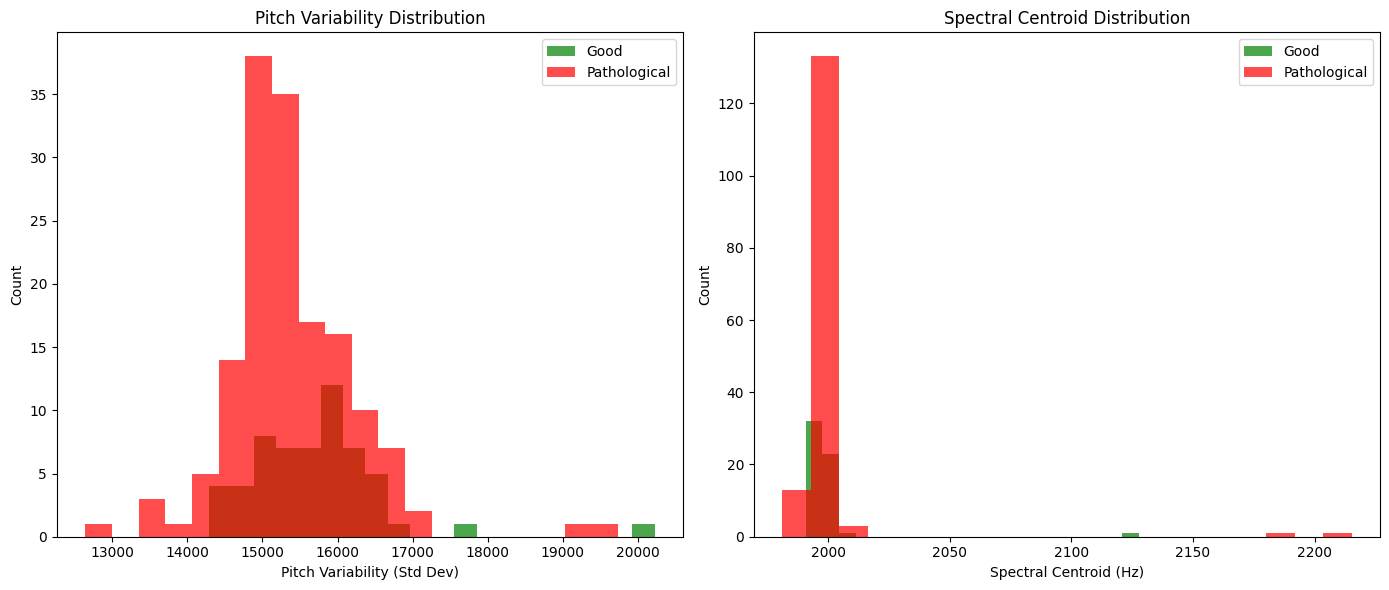

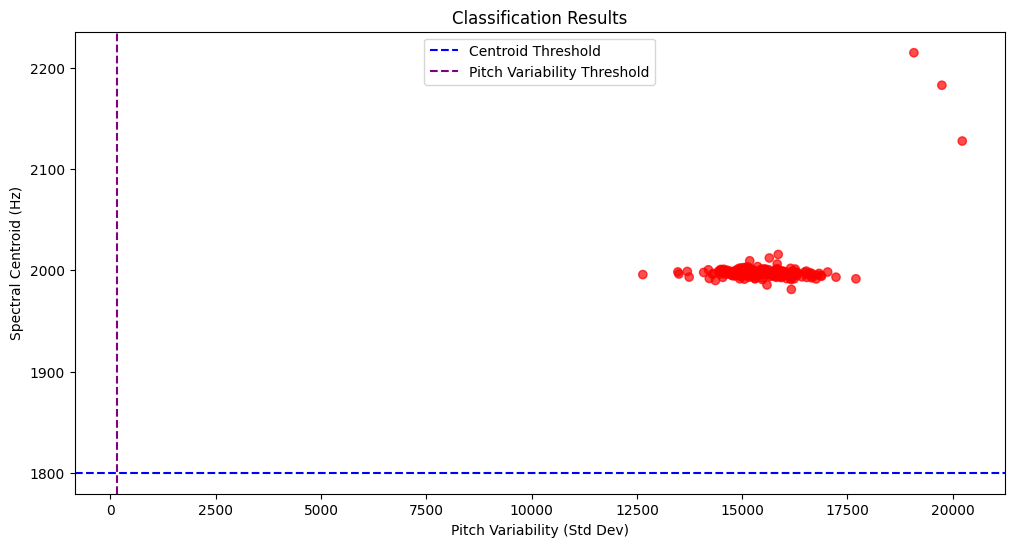

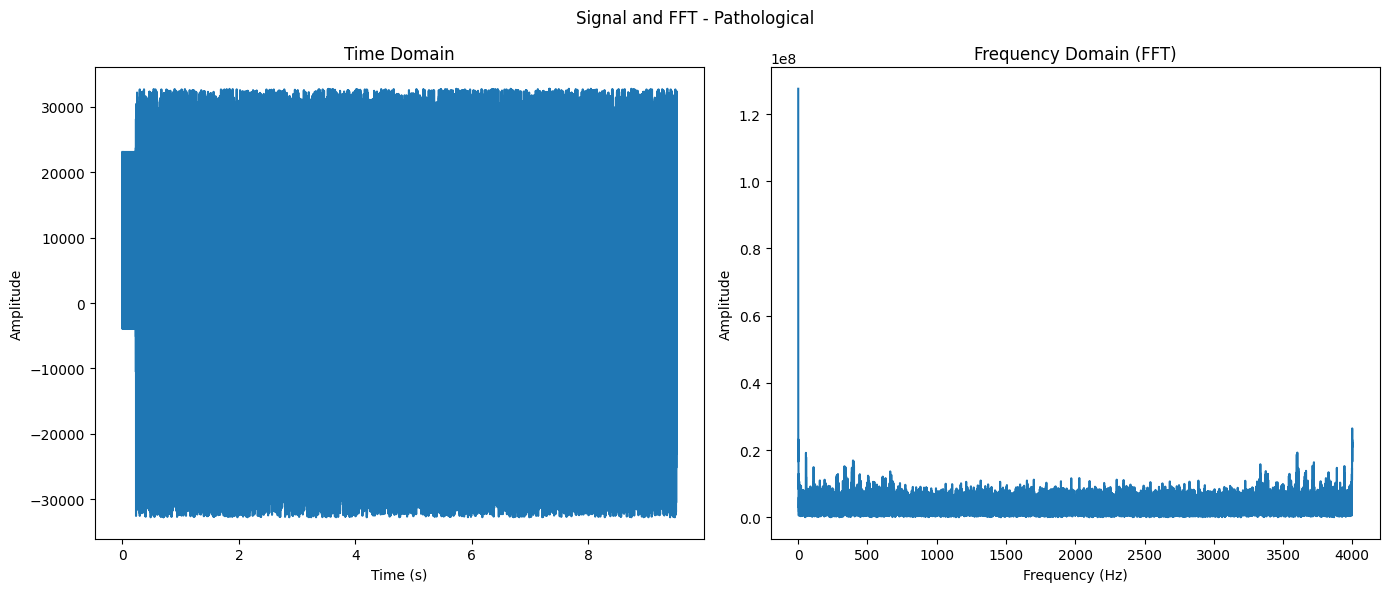

Labels: ['Pathological', 'Good', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Good', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Good', 'Good', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Good', 'Pathological', 'Good', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Good', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Good', 'Pathological', 'Pathological', 'Pathological', 'Good', 'Pathological', 'Good', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Good', 'Good', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Pathological', 'Good', 'Pathological', 'Pathol

C:\Users\elisk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\elisk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\elisk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft

# Funkce pro načtení dat ze složky
def load_audio_data(directory):
    audio_data = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.dat'):
            # Načtení binárního datového souboru
            file_path = os.path.join(directory, filename)
            signal = np.fromfile(file_path, dtype=np.int16)
            audio_data.append(signal)
            
            # Načtení labelu z odpovídajícího .txt souboru
            label_path = file_path.replace('.dat', '-info.txt')
            labels.append(load_label(label_path))
    return audio_data, labels

# Funkce pro načtení labelu z info souboru
def load_label(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Diagnosis:" in line:
            diagnosis = line.split(":")[1].strip().lower()
            if diagnosis in ["", "normal", "healthy"]:
                return "Good"
            else:
                return "Pathological"
    return "Unknown"

# Funkce pro výpočet základních časových vlastností
def calculate_time_features(audio_data):
    pitch_variability = []
    for signal in audio_data:
        # Směrodatná odchylka signálu
        std_dev = np.std(signal)
        pitch_variability.append(std_dev)
    return pitch_variability

# Funkce pro frekvenční analýzu (Fourierova transformace)
def calculate_frequency_features(audio_data, sample_rate=8000):
    spectral_centroids = []
    for signal in audio_data:
        # Výpočet FFT
        fft_values = np.abs(fft(signal))[:len(signal)//2]
        freqs = np.fft.fftfreq(len(signal), 1/sample_rate)[:len(signal)//2]
        
        # Spektrální centroid
        centroid = np.sum(freqs * fft_values) / np.sum(fft_values)
        spectral_centroids.append(centroid)
    return spectral_centroids

# Funkce pro klasifikaci podle prahů
def classify_signals(pitch_variability, spectral_centroids, pitch_threshold=150, centroid_threshold=1800):
    classifications = []
    for i in range(len(pitch_variability)):
        if pitch_variability[i] > pitch_threshold or spectral_centroids[i] > centroid_threshold:
            classifications.append('Pathological')
        else:
            classifications.append('Good')
    return classifications

# Vizualizace distribuce vlastností
def visualize_distributions(pitch_variability, spectral_centroids, labels):
    plt.figure(figsize=(14, 6))

    # Distribuce pitch_variability
    plt.subplot(1, 2, 1)
    plt.hist([pitch_variability[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([pitch_variability[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Pitch Variability Distribution")
    plt.xlabel("Pitch Variability (Std Dev)")
    plt.ylabel("Count")
    plt.legend()

    # Distribuce spectral_centroids
    plt.subplot(1, 2, 2)
    plt.hist([spectral_centroids[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([spectral_centroids[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Spectral Centroid Distribution")
    plt.xlabel("Spectral Centroid (Hz)")
    plt.ylabel("Count")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Vizualizace časového signálu a FFT pro jednotlivé záznamy
def visualize_signal_and_fft(signal, sample_rate=8000, title="Signal Visualization"):
    plt.figure(figsize=(14, 6))

    # Časový průběh
    plt.subplot(1, 2, 1)
    time = np.linspace(0, len(signal) / sample_rate, num=len(signal))
    plt.plot(time, signal)
    plt.title("Time Domain")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Frekvenční spektrum
    plt.subplot(1, 2, 2)
    fft_values = np.abs(fft(signal))[:len(signal)//2]
    freqs = np.fft.fftfreq(len(signal), 1/sample_rate)[:len(signal)//2]
    plt.plot(freqs, fft_values)
    plt.title("Frequency Domain (FFT)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Shrnutí výsledků v tabulce
def summarize_results(labels, classifications):
    from sklearn.metrics import confusion_matrix, classification_report

    cm = confusion_matrix(labels, classifications, labels=['Good', 'Pathological'])
    report = classification_report(labels, classifications, target_names=['Good', 'Pathological'])

    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

# Načtení dat ze složky
audio_data, labels = load_audio_data('voice-icar')

# Výpočet vlastností
pitch_variability = calculate_time_features(audio_data)
spectral_centroids = calculate_frequency_features(audio_data)

# Vizualizace distribuce vlastností
visualize_distributions(pitch_variability, spectral_centroids, labels)

# Klasifikace
classifications = classify_signals(pitch_variability, spectral_centroids)

# Vizualizace výsledků
def visualize_results(pitch_variability, spectral_centroids, classifications):
    plt.figure(figsize=(12, 6))
    plt.scatter(pitch_variability, spectral_centroids, c=['red' if c == 'Pathological' else 'green' for c in classifications], alpha=0.7)
    plt.axhline(y=1800, color='blue', linestyle='--', label='Centroid Threshold')
    plt.axvline(x=150, color='purple', linestyle='--', label='Pitch Variability Threshold')
    plt.xlabel('Pitch Variability (Std Dev)')
    plt.ylabel('Spectral Centroid (Hz)')
    plt.title('Classification Results')
    plt.legend()
    plt.show()

visualize_results(pitch_variability, spectral_centroids, classifications)

# Zobrazení časového a frekvenčního průběhu pro první záznam
visualize_signal_and_fft(audio_data[0], title=f"Signal and FFT - {labels[0]}")
print("Labels:", labels)

# Shrnutí výsledků
summarize_results(labels, classifications)



Dynamické prahy: Jitter = 0.6426920340714949, Shimmer = 0.8582138064299475


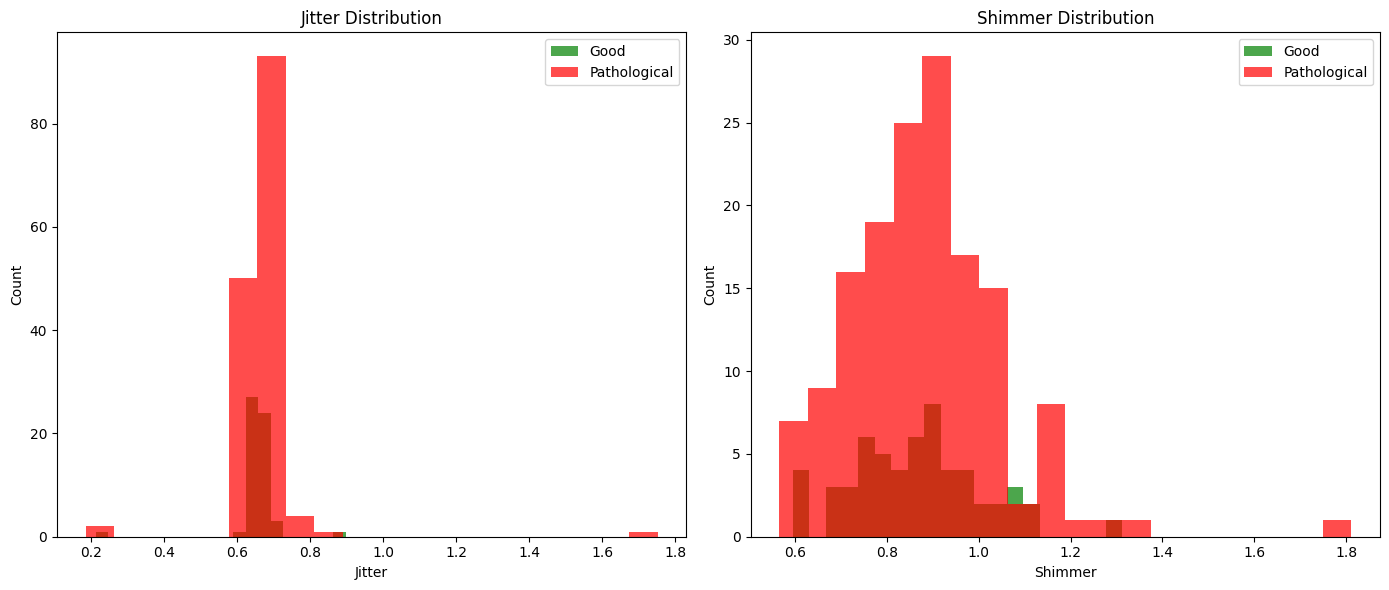

Confusion Matrix:
[[  3  54]
 [  4 147]]

Classification Report:
              precision    recall  f1-score   support

        Good       0.43      0.05      0.09        57
Pathological       0.73      0.97      0.84       151

    accuracy                           0.72       208
   macro avg       0.58      0.51      0.46       208
weighted avg       0.65      0.72      0.63       208



In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft

# Funkce pro načtení dat ze složky
def load_audio_data(directory):
    audio_data = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.dat'):
            # Načtení binárního datového souboru
            file_path = os.path.join(directory, filename)
            signal = np.fromfile(file_path, dtype=np.int16)
            audio_data.append(signal)
            
            # Načtení labelu z odpovídajícího .txt souboru
            label_path = file_path.replace('.dat', '-info.txt')
            labels.append(load_label(label_path))
    return audio_data, labels

# Funkce pro načtení labelu z info souboru
def load_label(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Diagnosis:" in line:
            diagnosis = line.split(":")[1].strip().lower()
            if diagnosis in ["", "normal", "healthy"]:
                return "Good"
            else:
                return "Pathological"
    return "Unknown"

# Funkce pro výpočet jitter (variace periody)
def calculate_jitter(audio_data):
    jitter_values = []
    for signal in audio_data:
        periods = np.diff(np.where(np.diff(np.sign(signal)) > 0)[0])
        if len(periods) > 1:
            jitter = np.std(periods) / np.mean(periods)
        else:
            jitter = 0
        jitter_values.append(jitter)
    return jitter_values

# Funkce pro výpočet shimmer (variace amplitudy)
def calculate_shimmer(audio_data):
    shimmer_values = []
    for signal in audio_data:
        amplitudes = np.abs(signal)
        diff_amplitudes = np.abs(np.diff(amplitudes))
        shimmer = np.mean(diff_amplitudes) / np.mean(amplitudes)
        shimmer_values.append(shimmer)
    return shimmer_values

# Funkce pro dynamickou optimalizaci prahů
def calculate_dynamic_thresholds(values_good, values_pathological):
    # Průměrná hodnota + odchylka pro každou kategorii
    threshold_good = np.mean(values_good) + np.std(values_good)
    threshold_pathological = np.mean(values_pathological) - np.std(values_pathological)
    # Práh je průměr mezi dvěma kategoriemi
    return (threshold_good + threshold_pathological) / 2

# Funkce pro klasifikaci podle dynamických prahů
def classify_signals_dynamic(jitter_values, shimmer_values, jitter_threshold, shimmer_threshold):
    classifications = []
    for i in range(len(jitter_values)):
        if jitter_values[i] > jitter_threshold or shimmer_values[i] > shimmer_threshold:
            classifications.append('Pathological')
        else:
            classifications.append('Good')
    return classifications

# Vizualizace distribuce vlastností
def visualize_distributions(jitter_values, shimmer_values, labels):
    plt.figure(figsize=(14, 6))

    # Distribuce jitter_values
    plt.subplot(1, 2, 1)
    plt.hist([jitter_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([jitter_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Jitter Distribution")
    plt.xlabel("Jitter")
    plt.ylabel("Count")
    plt.legend()

    # Distribuce shimmer_values
    plt.subplot(1, 2, 2)
    plt.hist([shimmer_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([shimmer_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Shimmer Distribution")
    plt.xlabel("Shimmer")
    plt.ylabel("Count")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Shrnutí výsledků v tabulce
def summarize_results(labels, classifications):
    from sklearn.metrics import confusion_matrix, classification_report

    cm = confusion_matrix(labels, classifications, labels=['Good', 'Pathological'])
    report = classification_report(labels, classifications, target_names=['Good', 'Pathological'])

    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

# Načtení dat ze složky
audio_data, labels = load_audio_data('voice-icar')

# Výpočet vlastností
jitter_values = calculate_jitter(audio_data)
shimmer_values = calculate_shimmer(audio_data)

# Oddělení hodnot podle skutečných labelů
jitter_good = [jitter_values[i] for i in range(len(labels)) if labels[i] == 'Good']
jitter_pathological = [jitter_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']
shimmer_good = [shimmer_values[i] for i in range(len(labels)) if labels[i] == 'Good']
shimmer_pathological = [shimmer_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']

# Dynamická optimalizace prahů
jitter_threshold = calculate_dynamic_thresholds(jitter_good, jitter_pathological)
shimmer_threshold = calculate_dynamic_thresholds(shimmer_good, shimmer_pathological)
print(f"Dynamické prahy: Jitter = {jitter_threshold}, Shimmer = {shimmer_threshold}")

# Vizualizace distribuce vlastností
visualize_distributions(jitter_values, shimmer_values, labels)

# Klasifikace podle dynamických prahů
classifications = classify_signals_dynamic(jitter_values, shimmer_values, jitter_threshold, shimmer_threshold)

# Shrnutí výsledků
summarize_results(labels, classifications)


Optimalizované prahy: HNR = -81.11219924105077, Slope = -6.544993186227827


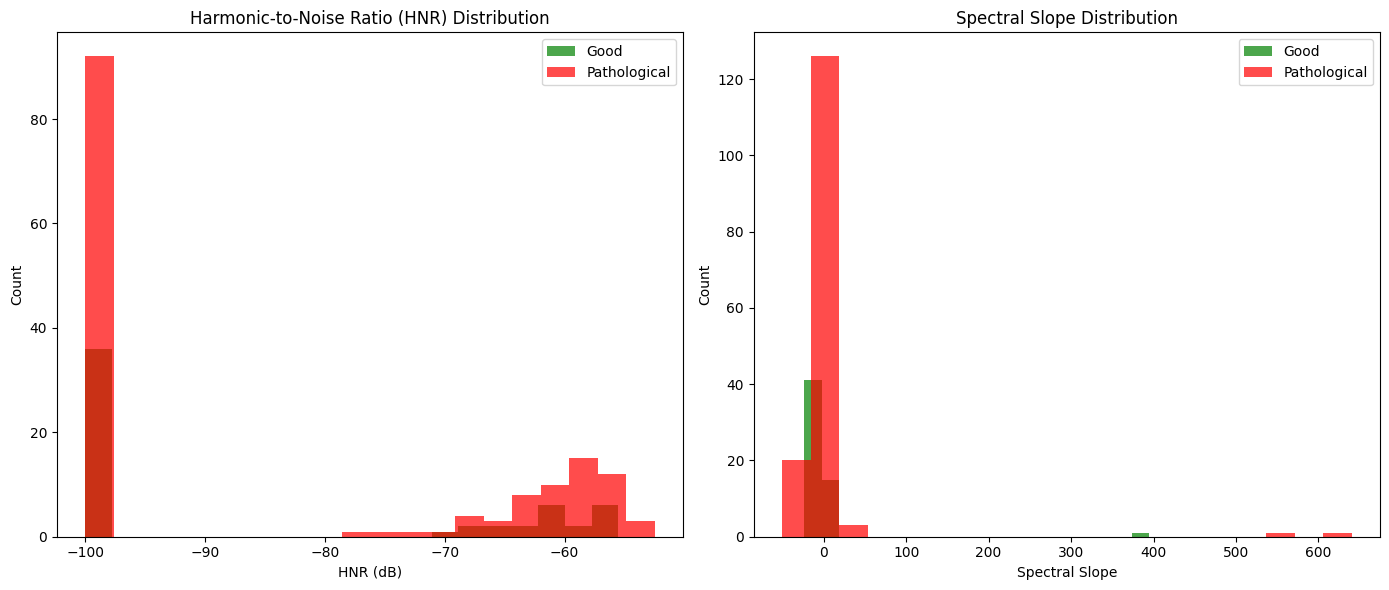

Confusion Matrix:
[[ 10  47]
 [ 33 118]]

Classification Report:
              precision    recall  f1-score   support

        Good       0.23      0.18      0.20        57
Pathological       0.72      0.78      0.75       151

    accuracy                           0.62       208
   macro avg       0.47      0.48      0.47       208
weighted avg       0.58      0.62      0.60       208



In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft

# Funkce pro načtení dat ze složky
def load_audio_data(directory):
    audio_data = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.dat'):
            # Načtení binárního datového souboru
            file_path = os.path.join(directory, filename)
            signal = np.fromfile(file_path, dtype=np.int16)
            audio_data.append(signal)
            
            # Načtení labelu z odpovídajícího .txt souboru
            label_path = file_path.replace('.dat', '-info.txt')
            labels.append(load_label(label_path))
    return audio_data, labels

# Funkce pro načtení labelu z info souboru
def load_label(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Diagnosis:" in line:
            diagnosis = line.split(":")[1].strip().lower()
            if diagnosis in ["", "normal", "healthy"]:
                return "Good"
            else:
                return "Pathological"
    return "Unknown"

# Funkce pro výpočet Harmonic-to-Noise Ratio (HNR)
def calculate_hnr(audio_data):
    hnr_values = []
    for signal in audio_data:
        harmonics = np.mean(signal ** 2)
        noise = np.var(signal)
        if noise > 0 and harmonics > 0:
            hnr = 10 * np.log10(harmonics / noise)
        else:
            hnr = -100  # Minimální hodnota, pokud není šum
        hnr_values.append(hnr)
    return hnr_values

# Funkce pro výpočet spektrálního sklonu (Spectral Slope)
def calculate_spectral_slope(audio_data, sample_rate=8000):
    spectral_slope_values = []
    for signal in audio_data:
        fft_values = np.abs(fft(signal))[:len(signal)//2]
        freqs = np.fft.fftfreq(len(signal), 1/sample_rate)[:len(signal)//2]
        if len(freqs) > 1:
            slope = np.polyfit(freqs, fft_values, 1)[0]  # Sklon fit lineárního regresního modelu
        else:
            slope = 0
        spectral_slope_values.append(slope)
    return spectral_slope_values

# Funkce pro optimalizaci prahů
def calculate_optimized_thresholds(values_good, values_pathological):
    if len(values_good) > 0 and len(values_pathological) > 0:
        threshold_good = np.percentile(values_good, 75)
        threshold_pathological = np.percentile(values_pathological, 25)
        # Střední hodnota mezi 75. percentilem Good a 25. percentilem Pathological
        return (threshold_good + threshold_pathological) / 2
    else:
        return 0  # Záložní hodnota, pokud nejsou data

# Funkce pro klasifikaci podle optimalizovaných prahů
def classify_signals_optimized(hnr_values, spectral_slope_values, hnr_threshold, slope_threshold):
    classifications = []
    for i in range(len(hnr_values)):
        if hnr_values[i] < hnr_threshold or spectral_slope_values[i] < slope_threshold:
            classifications.append('Pathological')
        else:
            classifications.append('Good')
    return classifications

# Vizualizace distribuce vlastností
def visualize_distributions(hnr_values, spectral_slope_values, labels):
    plt.figure(figsize=(14, 6))

    # Distribuce HNR
    plt.subplot(1, 2, 1)
    plt.hist([hnr_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([hnr_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Harmonic-to-Noise Ratio (HNR) Distribution")
    plt.xlabel("HNR (dB)")
    plt.ylabel("Count")
    plt.legend()

    # Distribuce spektrálního sklonu
    plt.subplot(1, 2, 2)
    plt.hist([spectral_slope_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([spectral_slope_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Spectral Slope Distribution")
    plt.xlabel("Spectral Slope")
    plt.ylabel("Count")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Shrnutí výsledků v tabulce
def summarize_results(labels, classifications):
    from sklearn.metrics import confusion_matrix, classification_report

    cm = confusion_matrix(labels, classifications, labels=['Good', 'Pathological'])
    report = classification_report(labels, classifications, target_names=['Good', 'Pathological'])

    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

# Načtení dat ze složky
audio_data, labels = load_audio_data('voice-icar')

# Výpočet vlastností
hnr_values = calculate_hnr(audio_data)
spectral_slope_values = calculate_spectral_slope(audio_data)

# Oddělení hodnot podle skutečných labelů
hnr_good = [hnr_values[i] for i in range(len(labels)) if labels[i] == 'Good']
hnr_pathological = [hnr_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']
slope_good = [spectral_slope_values[i] for i in range(len(labels)) if labels[i] == 'Good']
slope_pathological = [spectral_slope_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']

# Optimalizace prahů
hnr_threshold = calculate_optimized_thresholds(hnr_good, hnr_pathological)
slope_threshold = calculate_optimized_thresholds(slope_good, slope_pathological)
print(f"Optimalizované prahy: HNR = {hnr_threshold}, Slope = {slope_threshold}")

# Vizualizace distribuce vlastností
visualize_distributions(hnr_values, spectral_slope_values, labels)

# Klasifikace podle optimalizovaných prahů
classifications = classify_signals_optimized(hnr_values, spectral_slope_values, hnr_threshold, slope_threshold)

# Shrnutí výsledků
summarize_results(labels, classifications)


Optimalizované prahy: HNR = -81.11219924105077, Slope = -6.544993186227827, Jitter = 0.6596617867700364, Shimmer = 0.8640648365708481


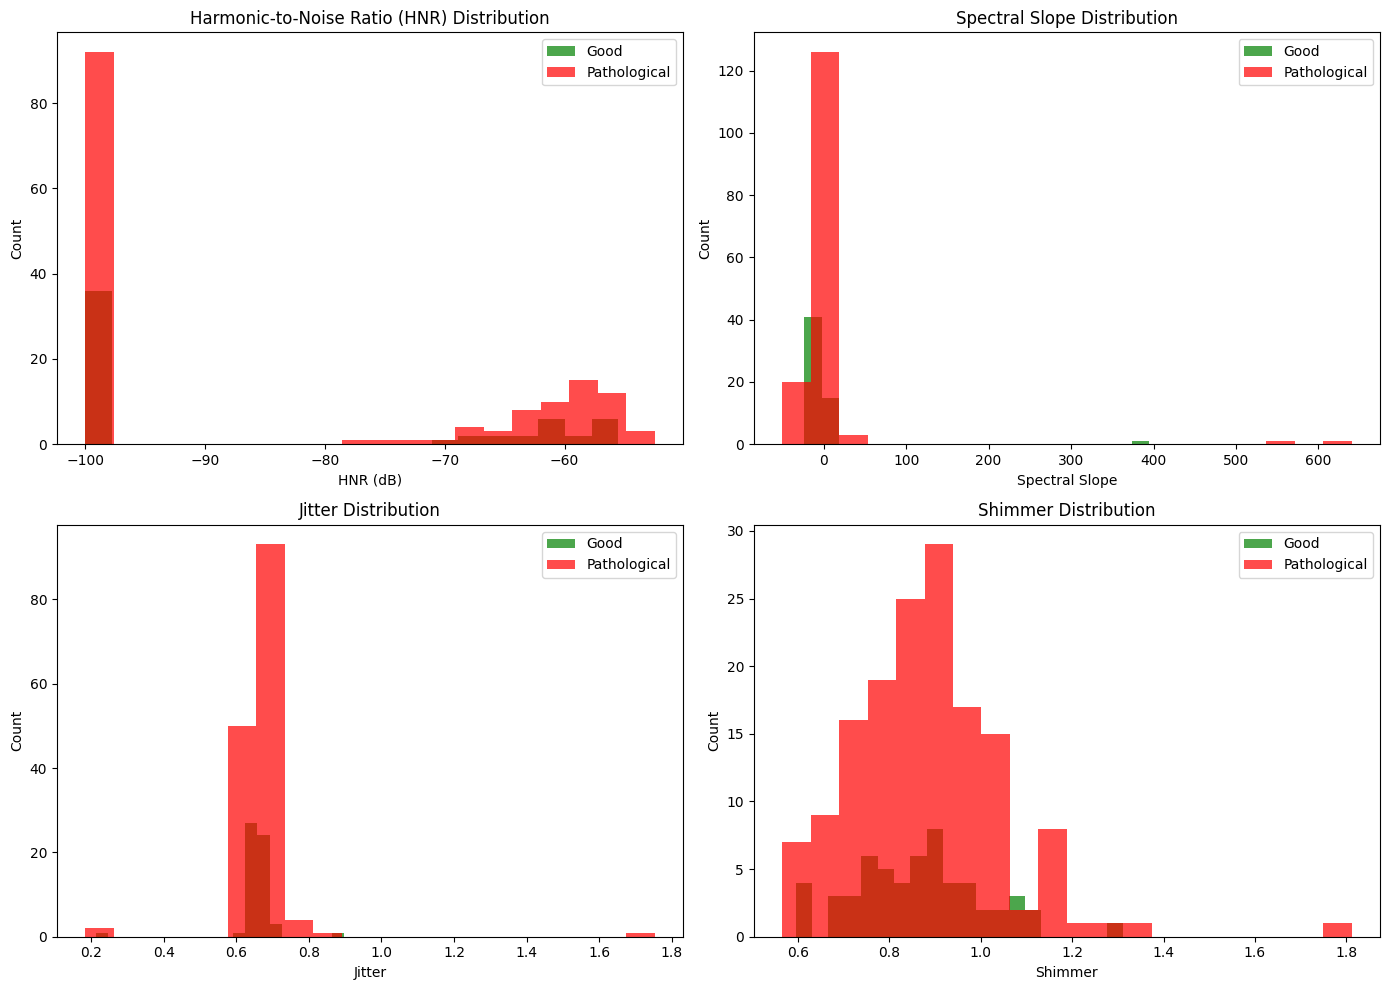

Confusion Matrix:
[[  1  56]
 [  0 151]]

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.02      0.03        57
Pathological       0.73      1.00      0.84       151

    accuracy                           0.73       208
   macro avg       0.86      0.51      0.44       208
weighted avg       0.80      0.73      0.62       208



In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft

# Funkce pro načtení dat ze složky
def load_audio_data(directory):
    audio_data = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.dat'):
            # Načtení binárního datového souboru
            file_path = os.path.join(directory, filename)
            signal = np.fromfile(file_path, dtype=np.int16)
            audio_data.append(signal)
            
            # Načtení labelu z odpovídajícího .txt souboru
            label_path = file_path.replace('.dat', '-info.txt')
            labels.append(load_label(label_path))
    return audio_data, labels

# Funkce pro načtení labelu z info souboru
def load_label(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Diagnosis:" in line:
            diagnosis = line.split(":")[1].strip().lower()
            if diagnosis in ["", "normal", "healthy"]:
                return "Good"
            else:
                return "Pathological"
    return "Unknown"

# Funkce pro výpočet Harmonic-to-Noise Ratio (HNR)
def calculate_hnr(audio_data):
    hnr_values = []
    for signal in audio_data:
        harmonics = np.mean(signal ** 2)
        noise = np.var(signal)
        if noise > 0 and harmonics > 0:
            hnr = 10 * np.log10(harmonics / noise)
        else:
            hnr = -100  # Minimální hodnota, pokud není šum
        hnr_values.append(hnr)
    return hnr_values

# Funkce pro výpočet spektrálního sklonu (Spectral Slope)
def calculate_spectral_slope(audio_data, sample_rate=8000):
    spectral_slope_values = []
    for signal in audio_data:
        fft_values = np.abs(fft(signal))[:len(signal)//2]
        freqs = np.fft.fftfreq(len(signal), 1/sample_rate)[:len(signal)//2]
        if len(freqs) > 1:
            slope = np.polyfit(freqs, fft_values, 1)[0]  # Sklon fit lineárního regresního modelu
        else:
            slope = 0
        spectral_slope_values.append(slope)
    return spectral_slope_values

# Funkce pro výpočet jitter (variace periody)
def calculate_jitter(audio_data):
    jitter_values = []
    for signal in audio_data:
        periods = np.diff(np.where(np.diff(np.sign(signal)) > 0)[0])
        if len(periods) > 1:
            jitter = np.std(periods) / np.mean(periods)
        else:
            jitter = 0
        jitter_values.append(jitter)
    return jitter_values

# Funkce pro výpočet shimmer (variace amplitudy)
def calculate_shimmer(audio_data):
    shimmer_values = []
    for signal in audio_data:
        amplitudes = np.abs(signal)
        diff_amplitudes = np.abs(np.diff(amplitudes))
        shimmer = np.mean(diff_amplitudes) / np.mean(amplitudes)
        shimmer_values.append(shimmer)
    return shimmer_values

# Funkce pro optimalizaci prahů
def calculate_optimized_thresholds(values_good, values_pathological):
    if len(values_good) > 0 and len(values_pathological) > 0:
        threshold_good = np.percentile(values_good, 75)
        threshold_pathological = np.percentile(values_pathological, 25)
        # Střední hodnota mezi 75. percentilem Good a 25. percentilem Pathological
        return (threshold_good + threshold_pathological) / 2
    else:
        return 0  # Záložní hodnota, pokud nejsou data

# Funkce pro klasifikaci podle optimalizovaných prahů
def classify_signals_optimized(hnr_values, spectral_slope_values, jitter_values, shimmer_values, hnr_threshold, slope_threshold, jitter_threshold, shimmer_threshold):
    classifications = []
    for i in range(len(hnr_values)):
        if (hnr_values[i] < hnr_threshold or
            spectral_slope_values[i] < slope_threshold or
            jitter_values[i] > jitter_threshold or
            shimmer_values[i] > shimmer_threshold):
            classifications.append('Pathological')
        else:
            classifications.append('Good')
    return classifications

# Vizualizace distribuce vlastností
def visualize_distributions(hnr_values, spectral_slope_values, jitter_values, shimmer_values, labels):
    plt.figure(figsize=(14, 10))

    # Distribuce HNR
    plt.subplot(2, 2, 1)
    plt.hist([hnr_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([hnr_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Harmonic-to-Noise Ratio (HNR) Distribution")
    plt.xlabel("HNR (dB)")
    plt.ylabel("Count")
    plt.legend()

    # Distribuce spektrálního sklonu
    plt.subplot(2, 2, 2)
    plt.hist([spectral_slope_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([spectral_slope_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Spectral Slope Distribution")
    plt.xlabel("Spectral Slope")
    plt.ylabel("Count")
    plt.legend()

    # Distribuce Jitter
    plt.subplot(2, 2, 3)
    plt.hist([jitter_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([jitter_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Jitter Distribution")
    plt.xlabel("Jitter")
    plt.ylabel("Count")
    plt.legend()

    # Distribuce Shimmer
    plt.subplot(2, 2, 4)
    plt.hist([shimmer_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([shimmer_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Shimmer Distribution")
    plt.xlabel("Shimmer")
    plt.ylabel("Count")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Shrnutí výsledků v tabulce
def summarize_results(labels, classifications):
    from sklearn.metrics import confusion_matrix, classification_report

    cm = confusion_matrix(labels, classifications, labels=['Good', 'Pathological'])
    report = classification_report(labels, classifications, target_names=['Good', 'Pathological'])

    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

# Načtení dat ze složky
audio_data, labels = load_audio_data('voice-icar')

# Výpočet vlastností
hnr_values = calculate_hnr(audio_data)
spectral_slope_values = calculate_spectral_slope(audio_data)
jitter_values = calculate_jitter(audio_data)
shimmer_values = calculate_shimmer(audio_data)

# Oddělení hodnot podle skutečných labelů
hnr_good = [hnr_values[i] for i in range(len(labels)) if labels[i] == 'Good']
hnr_pathological = [hnr_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']
slope_good = [spectral_slope_values[i] for i in range(len(labels)) if labels[i] == 'Good']
slope_pathological = [spectral_slope_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']
jitter_good = [jitter_values[i] for i in range(len(labels)) if labels[i] == 'Good']
jitter_pathological = [jitter_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']
shimmer_good = [shimmer_values[i] for i in range(len(labels)) if labels[i] == 'Good']
shimmer_pathological = [shimmer_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']

# Optimalizace prahů
hnr_threshold = calculate_optimized_thresholds(hnr_good, hnr_pathological)
slope_threshold = calculate_optimized_thresholds(slope_good, slope_pathological)
jitter_threshold = calculate_optimized_thresholds(jitter_good, jitter_pathological)
shimmer_threshold = calculate_optimized_thresholds(shimmer_good, shimmer_pathological)
print(f"Optimalizované prahy: HNR = {hnr_threshold}, Slope = {slope_threshold}, Jitter = {jitter_threshold}, Shimmer = {shimmer_threshold}")

# Vizualizace distribuce vlastností
visualize_distributions(hnr_values, spectral_slope_values, jitter_values, shimmer_values, labels)

# Klasifikace podle optimalizovaných prahů
classifications = classify_signals_optimized(hnr_values, spectral_slope_values, jitter_values, shimmer_values, hnr_threshold, slope_threshold, jitter_threshold, shimmer_threshold)

# Shrnutí výsledků
summarize_results(labels, classifications)


C:\Users\elisk\AppData\Local\Temp\ipykernel_14400\545331860.py:65: RuntimeWarning: invalid value encountered in log10
  hnr = 10 * np.log10(harmonics / noise)


Analyzing thresholds for Jitter
Weighted Threshold for Jitter: 0.6617318995749873
Analyzing thresholds for Shimmer
Weighted Threshold for Shimmer: 0.8724649946376757
Analyzing thresholds for HNR
Weighted Threshold for HNR: nan


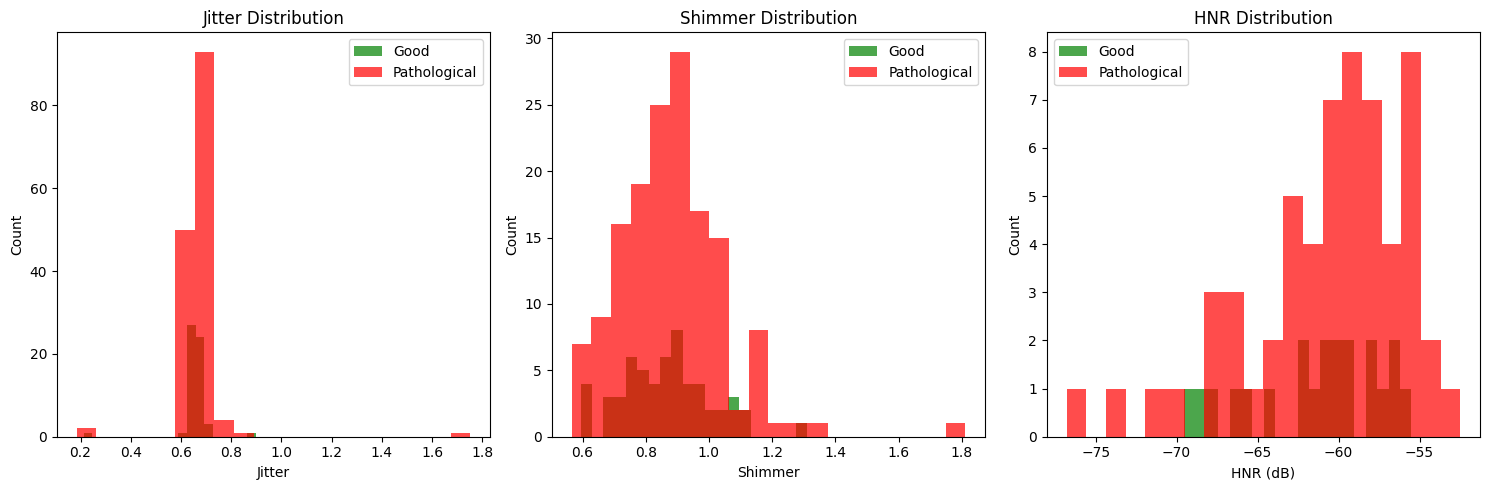

Confusion Matrix:
[[ 13  44]
 [ 18 133]]

Classification Report:
              precision    recall  f1-score   support

        Good       0.42      0.23      0.30        57
Pathological       0.75      0.88      0.81       151

    accuracy                           0.70       208
   macro avg       0.59      0.55      0.55       208
weighted avg       0.66      0.70      0.67       208



In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Funkce pro načtení dat ze složky
def load_audio_data(directory):
    audio_data = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.dat'):
            # Načtení binárního datového souboru
            file_path = os.path.join(directory, filename)
            signal = np.fromfile(file_path, dtype=np.int16)
            audio_data.append(signal)
            
            # Načtení labelu z odpovídajícího .txt souboru
            label_path = file_path.replace('.dat', '-info.txt')
            labels.append(load_label(label_path))
    return audio_data, labels

# Funkce pro načtení labelu z info souboru
def load_label(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Diagnosis:" in line:
            diagnosis = line.split(":")[1].strip().lower()
            if diagnosis in ["", "normal", "healthy"]:
                return "Good"
            else:
                return "Pathological"
    return "Unknown"

# Funkce pro výpočet jitter (variace periody)
def calculate_jitter(audio_data):
    jitter_values = []
    for signal in audio_data:
        periods = np.diff(np.where(np.diff(np.sign(signal)) > 0)[0])
        if len(periods) > 1:
            jitter = np.std(periods) / np.mean(periods)
        else:
            jitter = 0
        jitter_values.append(jitter)
    return jitter_values

# Funkce pro výpočet shimmer (variace amplitudy)
def calculate_shimmer(audio_data):
    shimmer_values = []
    for signal in audio_data:
        amplitudes = np.abs(signal)
        diff_amplitudes = np.abs(np.diff(amplitudes))
        shimmer = np.mean(diff_amplitudes) / np.mean(amplitudes)
        shimmer_values.append(shimmer)
    return shimmer_values

# Funkce pro výpočet HNR (Harmonic-to-Noise Ratio)
def calculate_hnr(audio_data):
    hnr_values = []
    for signal in audio_data:
        harmonics = np.mean(signal ** 2)
        noise = np.var(signal)
        if noise > 0:
            hnr = 10 * np.log10(harmonics / noise)
        else:
            hnr = -np.inf
        hnr_values.append(hnr)
    return hnr_values

# Funkce pro nastavení prahů s vážením podle distribuce
def weighted_thresholds(values_good, values_pathological, feature_name):
    print(f"Analyzing thresholds for {feature_name}")
    mean_good = np.mean(values_good)
    mean_pathological = np.mean(values_pathological)
    std_good = np.std(values_good)
    std_pathological = np.std(values_pathological)

    threshold = (mean_good + mean_pathological) / 2
    print(f"Weighted Threshold for {feature_name}: {threshold}")
    return threshold

# Funkce pro klasifikaci na základě tří vlastností
def classify_signals_combined(jitter_values, shimmer_values, hnr_values, jitter_threshold, shimmer_threshold, hnr_threshold):
    classifications = []
    for i in range(len(jitter_values)):
        if (jitter_values[i] > jitter_threshold or
            shimmer_values[i] > shimmer_threshold or
            hnr_values[i] < hnr_threshold):
            classifications.append('Pathological')
        else:
            classifications.append('Good')
    return classifications

# Vizualizace distribuce vlastností
def visualize_distributions_combined(jitter_values, shimmer_values, hnr_values, labels):
    plt.figure(figsize=(15, 5))

    # Distribuce Jitter
    plt.subplot(1, 3, 1)
    plt.hist([jitter_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([jitter_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Jitter Distribution")
    plt.xlabel("Jitter")
    plt.ylabel("Count")
    plt.legend()

    # Distribuce Shimmer
    plt.subplot(1, 3, 2)
    plt.hist([shimmer_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([shimmer_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Shimmer Distribution")
    plt.xlabel("Shimmer")
    plt.ylabel("Count")
    plt.legend()

    # Distribuce HNR
    plt.subplot(1, 3, 3)
    plt.hist([hnr_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([hnr_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("HNR Distribution")
    plt.xlabel("HNR (dB)")
    plt.ylabel("Count")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Shrnutí výsledků v tabulce
def summarize_results(labels, classifications):
    from sklearn.metrics import confusion_matrix, classification_report

    cm = confusion_matrix(labels, classifications, labels=['Good', 'Pathological'])
    report = classification_report(labels, classifications, target_names=['Good', 'Pathological'])

    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

# Načtení dat ze složky
audio_data, labels = load_audio_data('voice-icar')

# Výpočet vlastností
jitter_values = calculate_jitter(audio_data)
shimmer_values = calculate_shimmer(audio_data)
hnr_values = calculate_hnr(audio_data)

# Oddělení hodnot podle skutečných labelů
jitter_good = [jitter_values[i] for i in range(len(labels)) if labels[i] == 'Good']
jitter_pathological = [jitter_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']
shimmer_good = [shimmer_values[i] for i in range(len(labels)) if labels[i] == 'Good']
shimmer_pathological = [shimmer_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']
hnr_good = [hnr_values[i] for i in range(len(labels)) if labels[i] == 'Good']
hnr_pathological = [hnr_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']

# Nastavení prahů
jitter_threshold = weighted_thresholds(jitter_good, jitter_pathological, "Jitter")
shimmer_threshold = weighted_thresholds(shimmer_good, shimmer_pathological, "Shimmer")
hnr_threshold = weighted_thresholds(hnr_good, hnr_pathological, "HNR")

# Vizualizace distribuce vlastností
visualize_distributions_combined(jitter_values, shimmer_values, hnr_values, labels)

# Klasifikace podle kombinovaných prahů
classifications = classify_signals_combined(jitter_values, shimmer_values, hnr_values, jitter_threshold, shimmer_threshold, hnr_threshold)

# Shrnutí výsledků
summarize_results(labels, classifications)


C:\Users\elisk\AppData\Local\Temp\ipykernel_14400\1884384047.py:43: RuntimeWarning: invalid value encountered in log10
  hnr = 10 * np.log10(harmonics / noise)


Analyzing thresholds for HNR
Weighted Threshold for HNR: -85.21805523608128
Analyzing thresholds for Jitter
Weighted Threshold for Jitter: 6.872124416531496


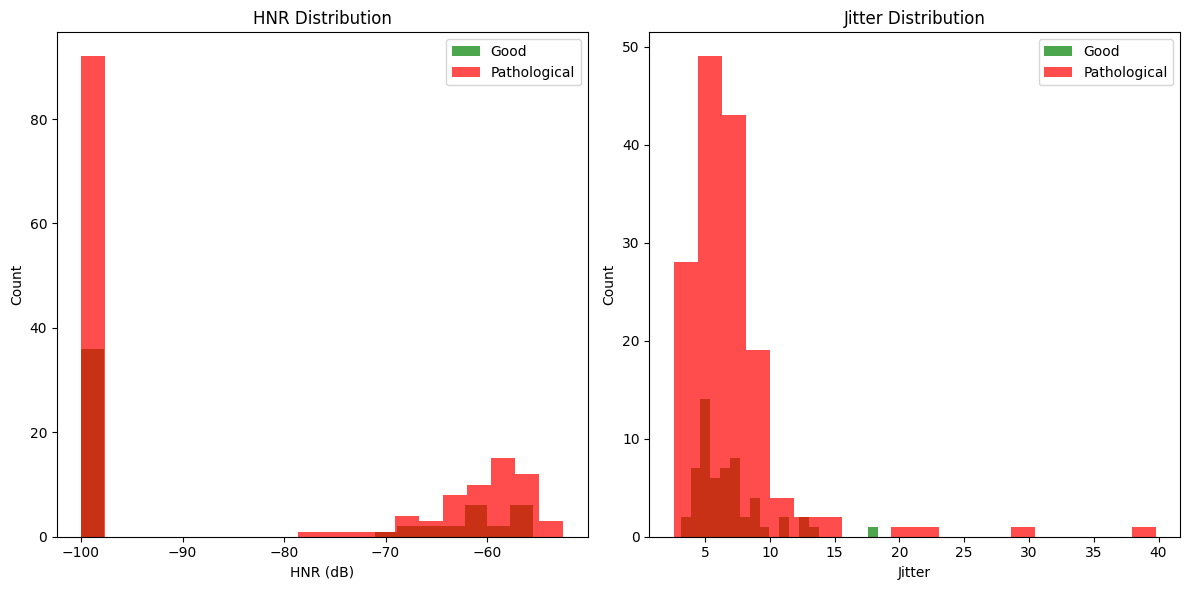

Confusion Matrix:
[[ 13  44]
 [ 35 116]]

Classification Report:
              precision    recall  f1-score   support

        Good       0.27      0.23      0.25        57
Pathological       0.72      0.77      0.75       151

    accuracy                           0.62       208
   macro avg       0.50      0.50      0.50       208
weighted avg       0.60      0.62      0.61       208



In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Funkce pro načtení dat ze složky
def load_audio_data(directory):
    audio_data = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.dat'):
            # Načtení binárního datového souboru
            file_path = os.path.join(directory, filename)
            signal = np.fromfile(file_path, dtype=np.int16)
            audio_data.append(signal)
            
            # Načtení labelu z odpovídajícího .txt souboru
            label_path = file_path.replace('.dat', '-info.txt')
            labels.append(load_label(label_path))
    return audio_data, labels

# Funkce pro načtení labelu z info souboru
def load_label(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Diagnosis:" in line:
            diagnosis = line.split(":")[1].strip().lower()
            if diagnosis in ["", "normal", "healthy"]:
                return "Good"
            else:
                return "Pathological"
    return "Unknown"

# Funkce pro výpočet HNR (Harmonic-to-Noise Ratio)
def calculate_hnr(audio_data):
    hnr_values = []
    for signal in audio_data:
        harmonics = np.mean(signal ** 2)
        noise = np.var(signal)
        if noise > 0:
            hnr = 10 * np.log10(harmonics / noise)
        else:
            hnr = -100  # Nahrazení neplatných hodnot nízkou konstantou
        hnr_values.append(hnr if np.isfinite(hnr) else -100)
    return hnr_values

# Funkce pro výpočet Jitter
# Jitter = průměrná relativní odchylka periody mezi po sobě jdoucími periody
def calculate_jitter(audio_data):
    jitter_values = []
    for signal in audio_data:
        signal = signal[np.abs(signal) > 1e-6]  # Odstranění příliš malých hodnot
        if len(signal) > 1:
            diffs = np.abs(np.diff(signal))
            jitter = np.mean(diffs / np.maximum(np.abs(signal[:-1]), 1e-6))
        else:
            jitter = 0
        jitter_values.append(jitter if np.isfinite(jitter) else 0)
    return jitter_values

# Funkce pro nastavení prahů s vážením podle distribuce
def weighted_thresholds(values_good, values_pathological, feature_name):
    print(f"Analyzing thresholds for {feature_name}")
    mean_good = np.mean(values_good)
    mean_pathological = np.mean(values_pathological)

    threshold = (mean_good + mean_pathological) / 2
    print(f"Weighted Threshold for {feature_name}: {threshold}")
    return threshold

# Funkce pro klasifikaci na základě více vlastností
def classify_signals_combined(hnr_values, jitter_values, hnr_threshold, jitter_threshold):
    classifications = []
    for hnr, jitter in zip(hnr_values, jitter_values):
        if hnr < hnr_threshold or jitter > jitter_threshold:
            classifications.append('Pathological')
        else:
            classifications.append('Good')
    return classifications

# Vizualizace distribucí vlastností
def visualize_feature_distributions(hnr_values, jitter_values, labels):
    plt.figure(figsize=(12, 6))

    # Distribuce HNR
    plt.subplot(1, 2, 1)
    plt.hist([hnr_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([hnr_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("HNR Distribution")
    plt.xlabel("HNR (dB)")
    plt.ylabel("Count")
    plt.legend()

    # Distribuce Jitter
    plt.subplot(1, 2, 2)
    plt.hist([jitter_values[i] for i in range(len(labels)) if labels[i] == 'Good'], bins=20, alpha=0.7, label='Good', color='green')
    plt.hist([jitter_values[i] for i in range(len(labels)) if labels[i] == 'Pathological'], bins=20, alpha=0.7, label='Pathological', color='red')
    plt.title("Jitter Distribution")
    plt.xlabel("Jitter")
    plt.ylabel("Count")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Shrnutí výsledků v tabulce
def summarize_results(labels, classifications):
    from sklearn.metrics import confusion_matrix, classification_report

    cm = confusion_matrix(labels, classifications, labels=['Good', 'Pathological'])
    report = classification_report(labels, classifications, target_names=['Good', 'Pathological'])

    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

# Načtení dat ze složky
audio_data, labels = load_audio_data('voice-icar')

# Výpočet vlastností
hnr_values = calculate_hnr(audio_data)
jitter_values = calculate_jitter(audio_data)

# Oddělení hodnot podle skutečných labelů
hnr_good = [hnr_values[i] for i in range(len(labels)) if labels[i] == 'Good']
hnr_pathological = [hnr_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']
jitter_good = [jitter_values[i] for i in range(len(labels)) if labels[i] == 'Good']
jitter_pathological = [jitter_values[i] for i in range(len(labels)) if labels[i] == 'Pathological']

# Nastavení prahů
hnr_threshold = weighted_thresholds(hnr_good, hnr_pathological, "HNR")
jitter_threshold = weighted_thresholds(jitter_good, jitter_pathological, "Jitter")

# Vizualizace distribucí vlastností
visualize_feature_distributions(hnr_values, jitter_values, labels)

# Klasifikace na základě HNR a Jitter
classifications = classify_signals_combined(hnr_values, jitter_values, hnr_threshold, jitter_threshold)

# Shrnutí výsledků
summarize_results(labels, classifications)


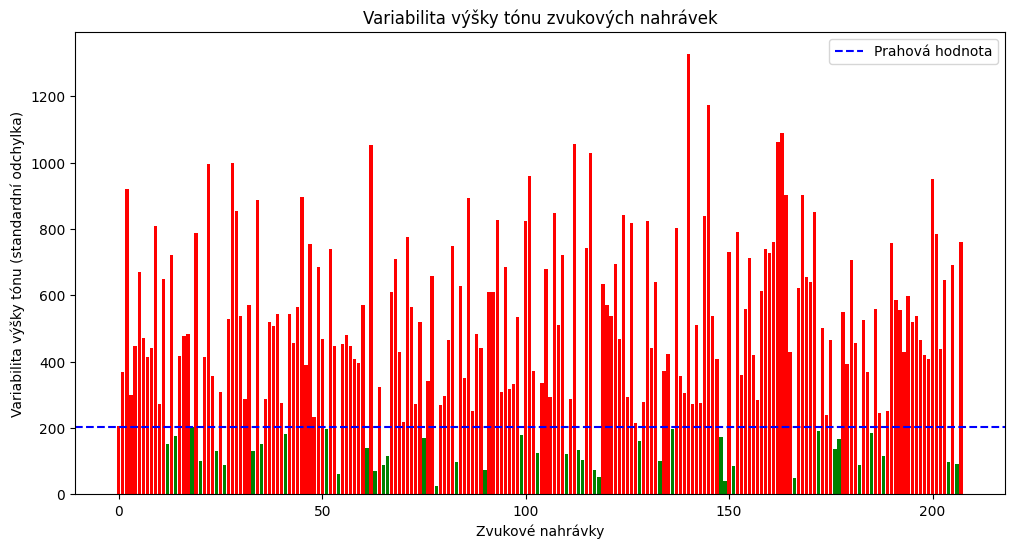

In [34]:
import wfdb
import numpy as np
import os
import librosa

def nacti_zvukova_data(slozka):
    """ Načte zvuková data a odpovídající štítky ze složky """
    zvukova_data = []
    stitky = []
    
    for soubor in os.listdir(slozka):
        if soubor.endswith('.dat'):
            # Načtení signálu
            zaznam = wfdb.rdrecord(os.path.join(slozka, soubor[:-4]))  # Odstraníme .dat
            zvukova_data.append(zaznam.p_signal.flatten())
            
            # Načtení štítků
            stitek = nacti_stitek(os.path.join(slozka, soubor[:-4]))
            stitky.append(stitek)
    
    return zvukova_data, stitky

def nacti_stitek(nazev_souboru):
    """ Načte štítek z odpovídajícího souboru .txt """
    with open(nazev_souboru + '.txt', 'r') as f:
        stitek = f.readline().strip()
    return stitek


# Načtení dat
zvukova_data, stitky = nacti_zvukova_data('voice-icar/')



def extrahuj_vysku_tonu(zvukova_data):
    """ Extrahuje výšku tónu ze zvukových dat """
    vysky_tonu = []
    
    for signal in zvukova_data:
        vyska, _ = librosa.piptrack(y=signal, sr=8000)  # Sampling rate
        max_vyska = np.max(vyska, axis=0)
        vysky_tonu.append(max_vyska[max_vyska > 0])  # Pouze kladné hodnoty
    
    return vysky_tonu

# Extrahování výšky tónu
vysky_tonu = extrahuj_vysku_tonu(zvukova_data)

def vypocitej_variabilitu(vysky_tonu):
    """ Vypočítá variabilitu výšky tónu """
    variabilita = []
    
    for vyska in vysky_tonu:
        if len(vyska) > 0:
            std_odchylka = np.std(vyska)
            variabilita.append(std_odchylka)
        else:
            variabilita.append(0)
    
    return variabilita

# Výpočet variability
variabilita_vysky_tonu = vypocitej_variabilitu(vysky_tonu)

def klasifikuj_podle_variability(variabilita, prah):
    """ Klasifikuje zvukové nahrávky podle variability výšky tónu """
    klasifikace = []
    
    for var in variabilita:
        if var > prah:
            klasifikace.append('Patologická')
        else:
            klasifikace.append('Dobrá')
    
    return klasifikace

# Prahová hodnota
prah = 204
klasifikace = klasifikuj_podle_variability(variabilita_vysky_tonu, prah)

import matplotlib.pyplot as plt

def vykresli_variabilitu(variabilita, klasifikace):
    """ Vizualizace variability výšky tónu """
    plt.figure(figsize=(12, 6))
    
    # Barvy podle klasifikace
    barvy = ['green' if c == 'Dobrá' else 'red' for c in klasifikace]
    plt.bar(range(len(variabilita)), variabilita, color=barvy)
    
    # Práh
    plt.axhline(y=prah, color='blue', linestyle='--', label='Prahová hodnota')
    
    plt.title('Variabilita výšky tónu zvukových nahrávek')
    plt.xlabel('Zvukové nahrávky')
    plt.ylabel('Variabilita výšky tónu (standardní odchylka)')
    plt.legend()
    plt.show()

# Vykreslení grafu
vykresli_variabilitu(variabilita_vysky_tonu, klasifikace)


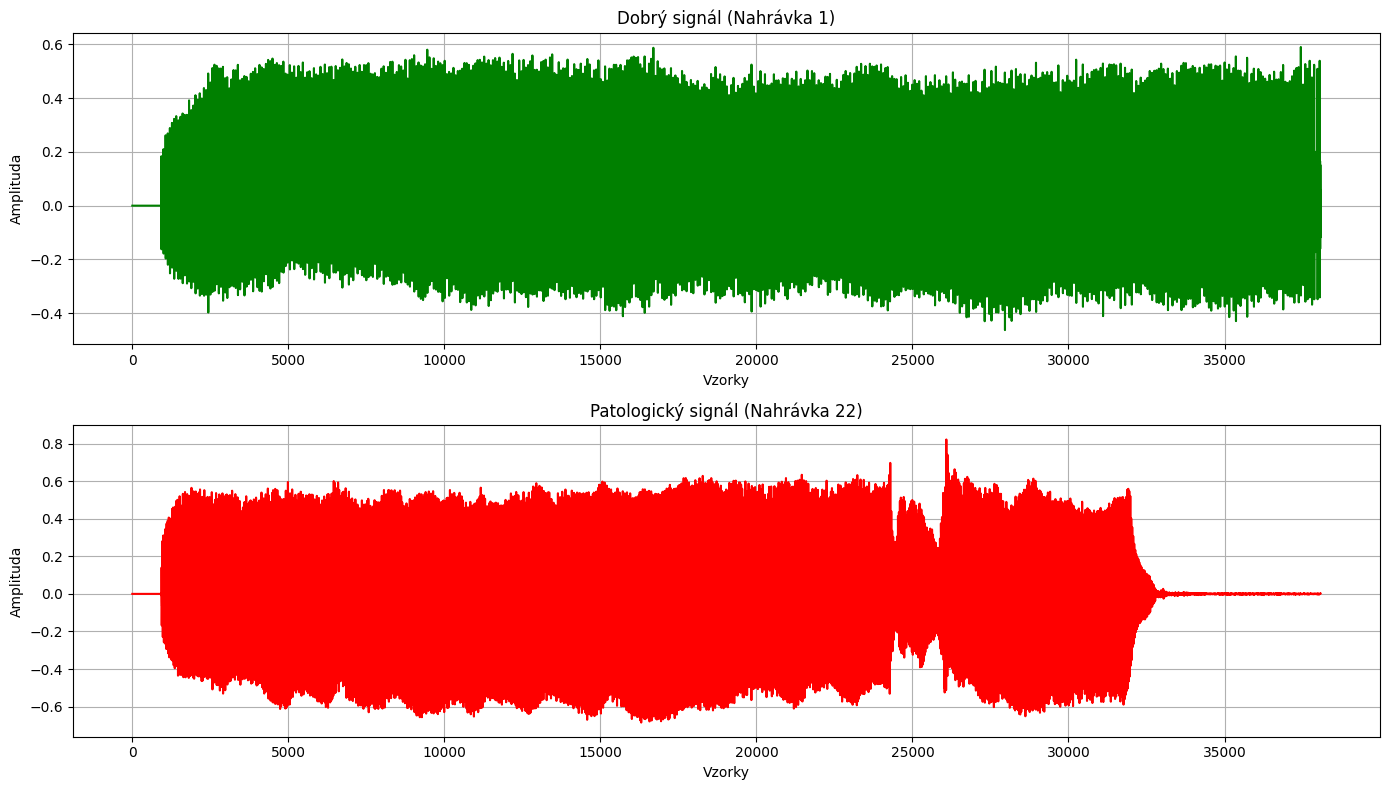

Klasifikace       Dobrá  Patologická
Skutečná hodnota                    
0.000000             41          167


In [37]:
import matplotlib.pyplot as plt
import pandas as pd

def vizualizuj_signaly(zvukova_data, klasifikace, variabilita_vysky_tonu, index_dobreho, index_spatneho):
    """ Vykreslí grafy dobrého a patologického signálu """
    dobry_signal = zvukova_data[index_dobreho]
    spatny_signal = zvukova_data[index_spatneho]
    
    plt.figure(figsize=(14, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(dobry_signal, color='green')
    plt.title(f'Dobrý signál (Nahrávka {index_dobreho + 1})')
    plt.xlabel('Vzorky')
    plt.ylabel('Amplituda')
    plt.grid()
    
    plt.subplot(2, 1, 2)
    plt.plot(spatny_signal, color='red')
    plt.title(f'Patologický signál (Nahrávka {index_spatneho + 1})')
    plt.xlabel('Vzorky')
    plt.ylabel('Amplituda')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

index_dobreho = 0
index_spatneho = 21

vizualizuj_signaly(zvukova_data, klasifikace, variabilita_vysky_tonu, index_dobreho, index_spatneho)

# Vytvoření tabulky s výsledky klasifikace
vysledky_df = pd.DataFrame({'Skutečná hodnota': stitky, 'Klasifikace': klasifikace})
souhrn = vysledky_df.groupby(['Skutečná hodnota', 'Klasifikace']).size().unstack(fill_value=0)

# Výpis souhrnu
print(souhrn)

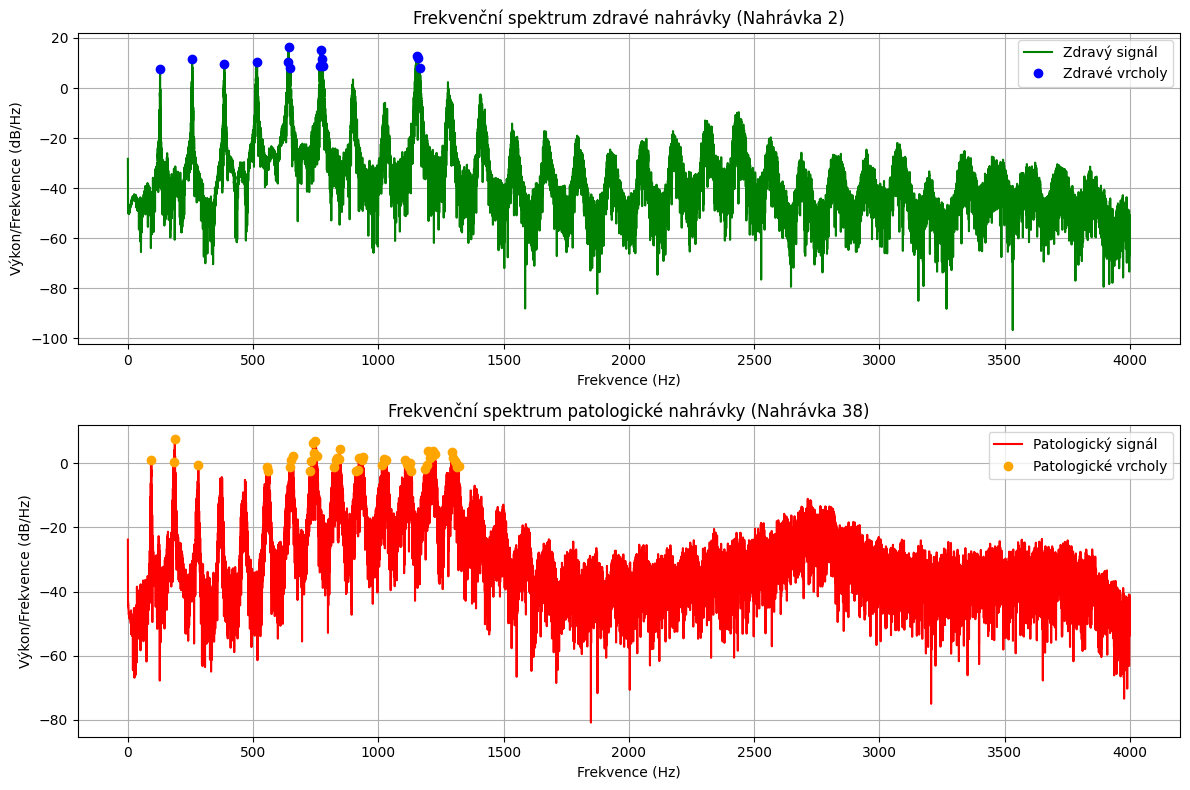

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

def vypocitej_fourierovu_analyzu(signal, vzorkovaci_frekvence=8000):
    fft_vysledek = np.fft.fft(signal)
    fft_frekvence = np.fft.fftfreq(len(signal), d=1 / vzorkovaci_frekvence)
    psd = np.abs(fft_vysledek) ** 2 / len(signal)
    kladne_frekvence = fft_frekvence[fft_frekvence >= 0]
    kladne_psd = psd[fft_frekvence >= 0]
    return kladne_frekvence, kladne_psd

def oznac_dominantni_frekvence(frekvence, psd, ax, barva, popisek):
    vrcholy, _ = find_peaks(psd, height=np.max(psd) * 0.1, distance=20)
    ax.plot(frekvence[vrcholy], 10 * np.log10(psd[vrcholy]), 'o', color=barva, label=popisek)
    return vrcholy

def vykresli_harmonicke_frekvence(hlavni_frekvence, frekvence, ax, barva):
    for harmonicka in range(1, 10):
        harmonicka_frekvence = harmonicka * hlavni_frekvence
        if harmonicka_frekvence < max(frekvence):
            ax.axvline(harmonicka_frekvence, color=barva, linestyle='--', alpha=0.5, label=f'Harmonická {harmonicka}')

def vypocitej_hnr(frekvence, psd, harmonicke_frekvence):
    energie_harmonickych = sum(np.sum(psd[(frekvence > f - 50) & (frekvence < f + 50)]) for f in harmonicke_frekvence)
    sum_hluk = np.sum(psd[(frekvence < min(harmonicke_frekvence) - 50) | (frekvence > max(harmonicke_frekvence) + 50)])
    return float('inf') if sum_hluk == 0 else energie_harmonickych / sum_hluk

def vizualizuj_frekvencni_spektrum(zvukova_data, klasifikace, index_dobreho, index_spatneho, vzorkovaci_frekvence=8000):
    dobry_signal = zvukova_data[index_dobreho]
    spatny_signal = zvukova_data[index_spatneho]
    
    dobre_frekvence, dobre_psd = vypocitej_fourierovu_analyzu(dobry_signal, vzorkovaci_frekvence)
    spatne_frekvence, spatne_psd = vypocitej_fourierovu_analyzu(spatny_signal, vzorkovaci_frekvence)
    
    plt.figure(figsize=(12, 8))
    
    ax1 = plt.subplot(2, 1, 1)
    plt.plot(dobre_frekvence, 10 * np.log10(dobre_psd), color='green', label='Zdravý signál')
    oznac_dominantni_frekvence(dobre_frekvence, dobre_psd, ax1, 'blue', 'Zdravé vrcholy')
    plt.title(f'Frekvenční spektrum zdravé nahrávky (Nahrávka {index_dobreho + 1})')
    plt.xlabel('Frekvence (Hz)')
    plt.ylabel('Výkon/Frekvence (dB/Hz)')
    plt.grid()
    plt.legend()
    
    ax2 = plt.subplot(2, 1, 2)
    plt.plot(spatne_frekvence, 10 * np.log10(spatne_psd), color='red', label='Patologický signál')
    oznac_dominantni_frekvence(spatne_frekvence, spatne_psd, ax2, 'orange', 'Patologické vrcholy')
    plt.title(f'Frekvenční spektrum patologické nahrávky (Nahrávka {index_spatneho + 1})')
    plt.xlabel('Frekvence (Hz)')
    plt.ylabel('Výkon/Frekvence (dB/Hz)')
    plt.grid()
    plt.legend()
    
    plt.tight_layout()
    plt.show()

index_dobreho = 1
index_spatneho = 37

vizualizuj_frekvencni_spektrum(zvukova_data, klasifikace, index_dobreho, index_spatneho)

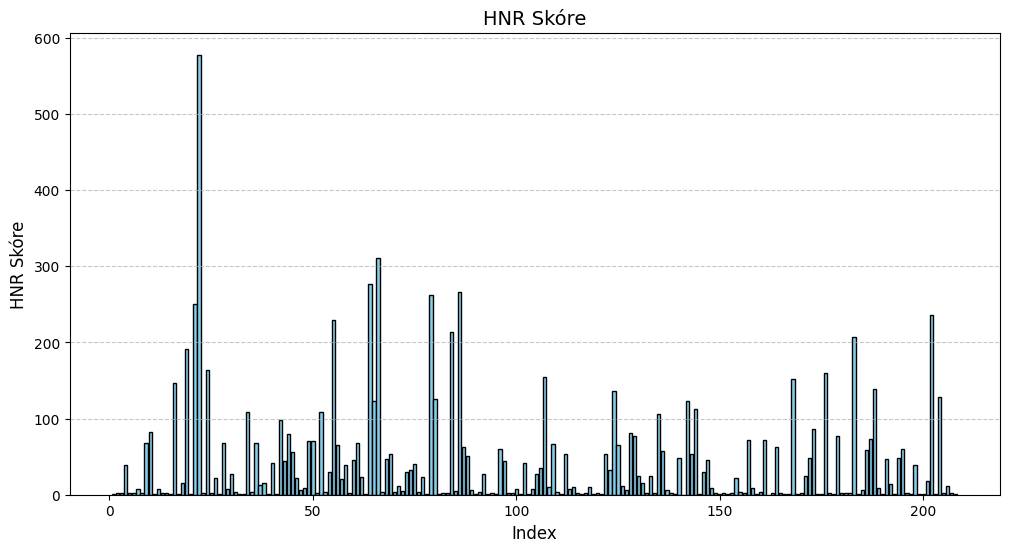

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

def vypocitej_fourierovu_analyzu(signal, vzorkovaci_frekvence=8000):
    fft_vysledek = np.fft.fft(signal)
    fft_frekvence = np.fft.fftfreq(len(signal), d=1 / vzorkovaci_frekvence)
    psd = np.abs(fft_vysledek) ** 2 / len(signal)
    kladne_frekvence = fft_frekvence[fft_frekvence >= 0]
    kladne_psd = psd[fft_frekvence >= 0]
    return kladne_frekvence, kladne_psd

def vypocitej_hnr(frekvence, psd, harmonicke_frekvence):
    energie_harmonickych = sum(np.sum(psd[(frekvence > f - 50) & (frekvence < f + 50)]) for f in harmonicke_frekvence)
    sum_hluk = np.sum(psd[(frekvence < min(harmonicke_frekvence) - 50) | (frekvence > max(harmonicke_frekvence) + 50)])
    return float('inf') if sum_hluk == 0 else energie_harmonickych / sum_hluk

def vypocitej_hnr_pro_vsechny(zvukova_data, vzorkovaci_frekvence=8000):
    """ Výpočet HNR pro všechny záznamy """
    hnr_hodnoty = []
    for index, signal in enumerate(zvukova_data):
        frekvence, psd = vypocitej_fourierovu_analyzu(signal, vzorkovaci_frekvence)
        hlavni_frekvence = frekvence[np.argmax(psd)]
        harmonicke_frekvence = [hlavni_frekvence * i for i in range(1, 10)]
        hnr = vypocitej_hnr(frekvence, psd, harmonicke_frekvence)
        hnr_hodnoty.append(hnr)
    return hnr_hodnoty

def vykresli_hnr_skore(hnr_hodnoty):
    """ Vizualizace HNR skóre """
    plt.figure(figsize=(12, 6))
    plt.bar(range(1, len(hnr_hodnoty) + 1), hnr_hodnoty, color='skyblue', edgecolor='black')
    plt.title('HNR Skóre', fontsize=14)
    plt.xlabel('Index', fontsize=12)
    plt.ylabel('HNR Skóre', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Výpočet a uložení výsledků do CSV
vzorkovaci_frekvence = 8000
hnr_hodnoty = vypocitej_hnr_pro_vsechny(zvukova_data, vzorkovaci_frekvence)
vykresli_hnr_skore(hnr_hodnoty)

# Uložení do CSV
hnr_df = pd.DataFrame({'Index': range(1, len(hnr_hodnoty) + 1), 'HNR Skóre': hnr_hodnoty})
hnr_df.to_csv('vysledky.csv', index=False, encoding='utf-8')


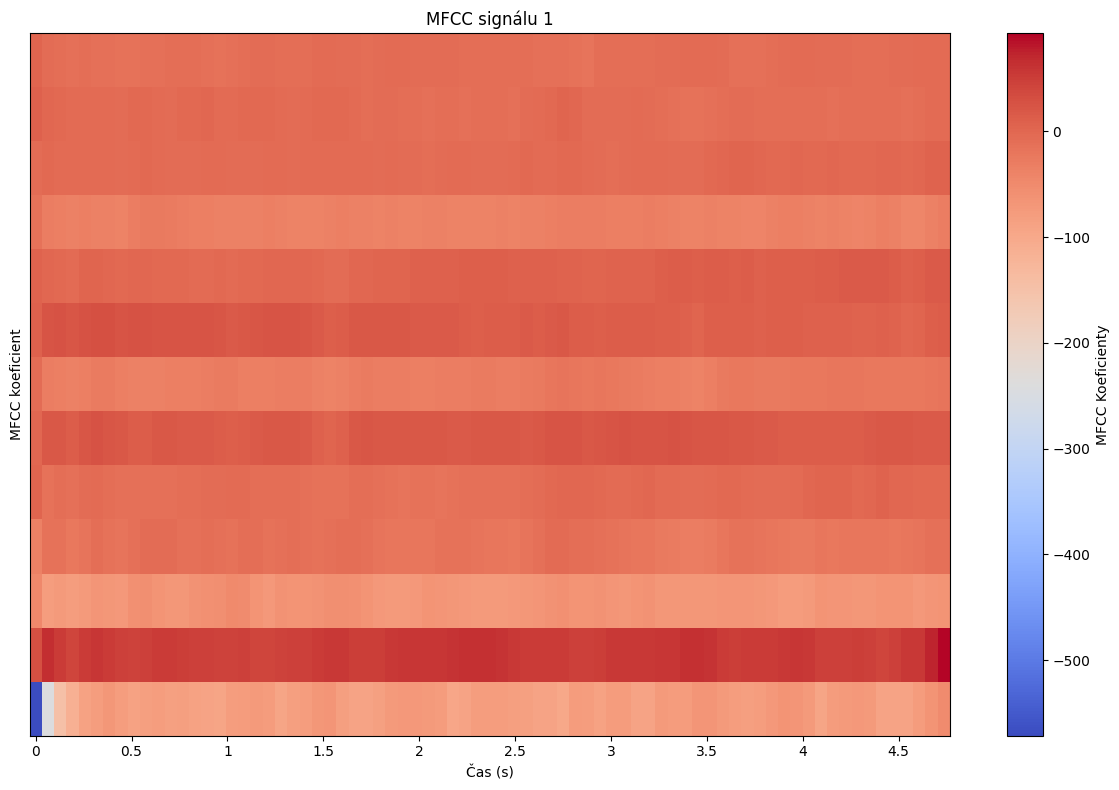

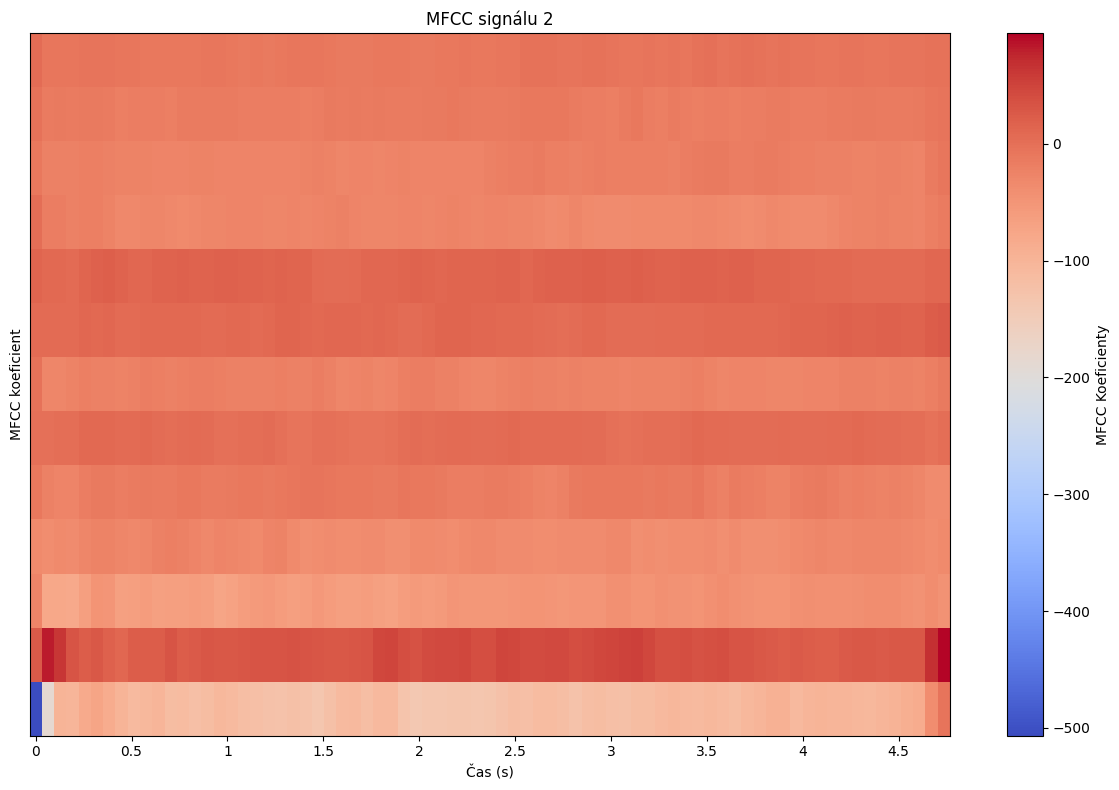

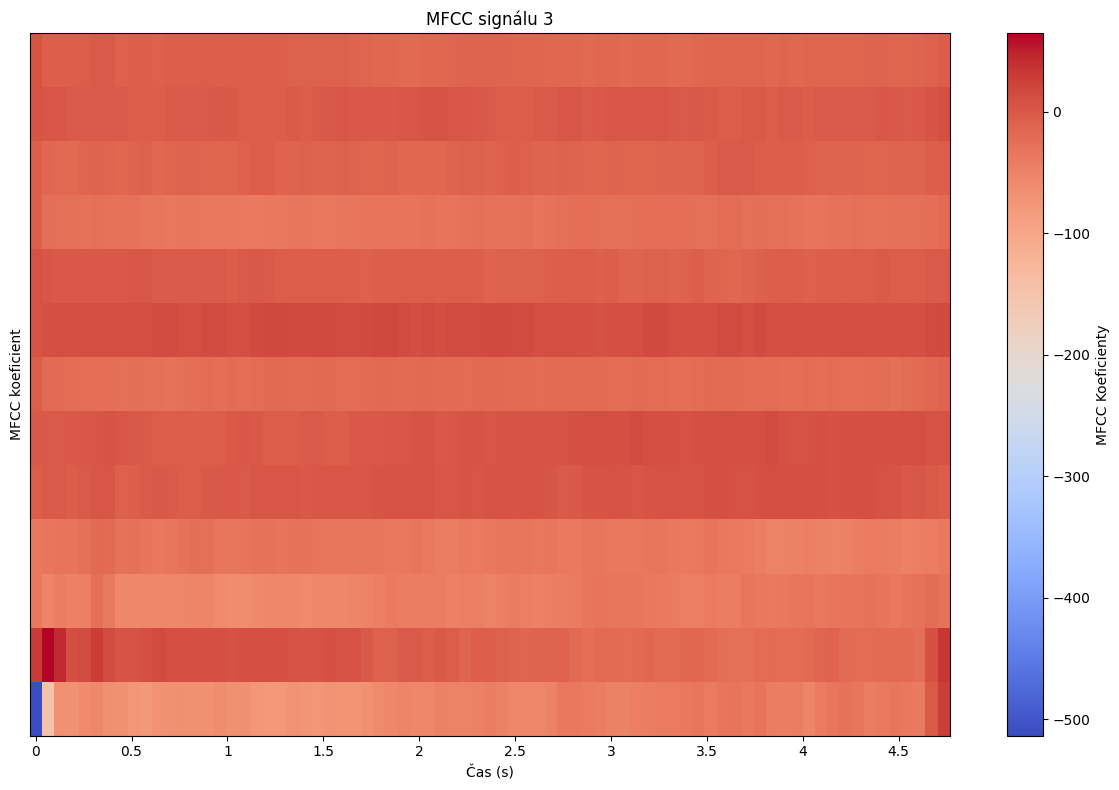

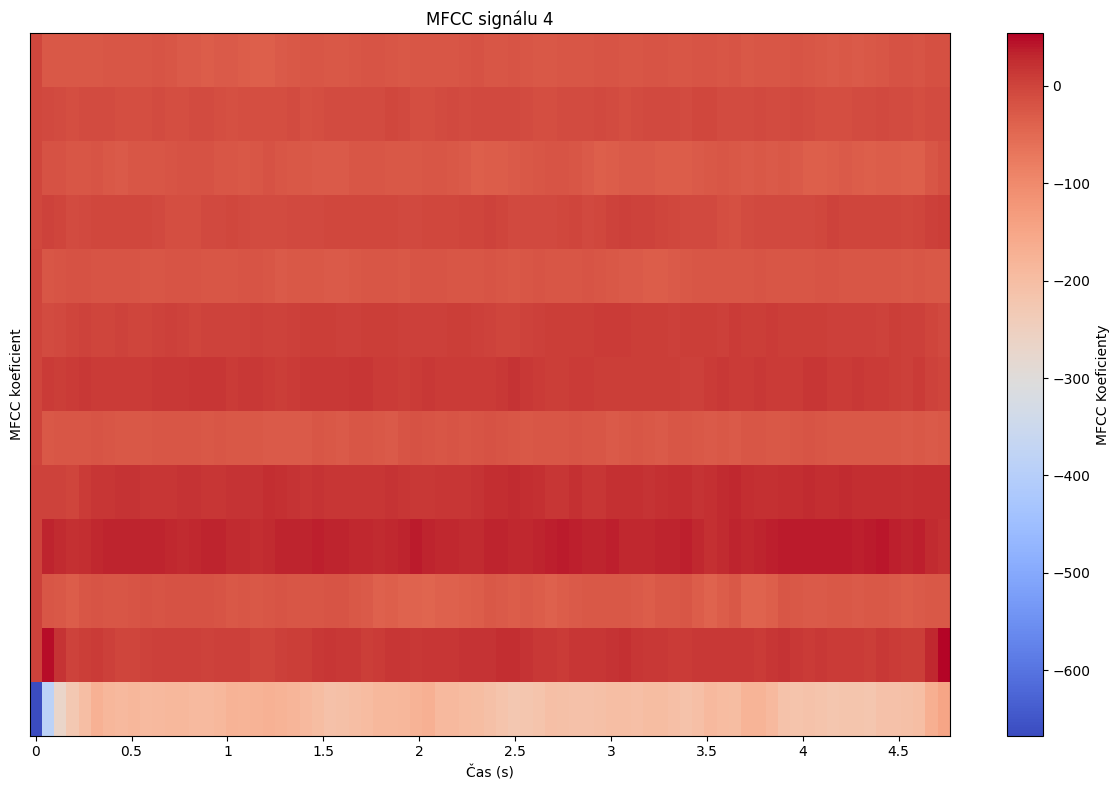

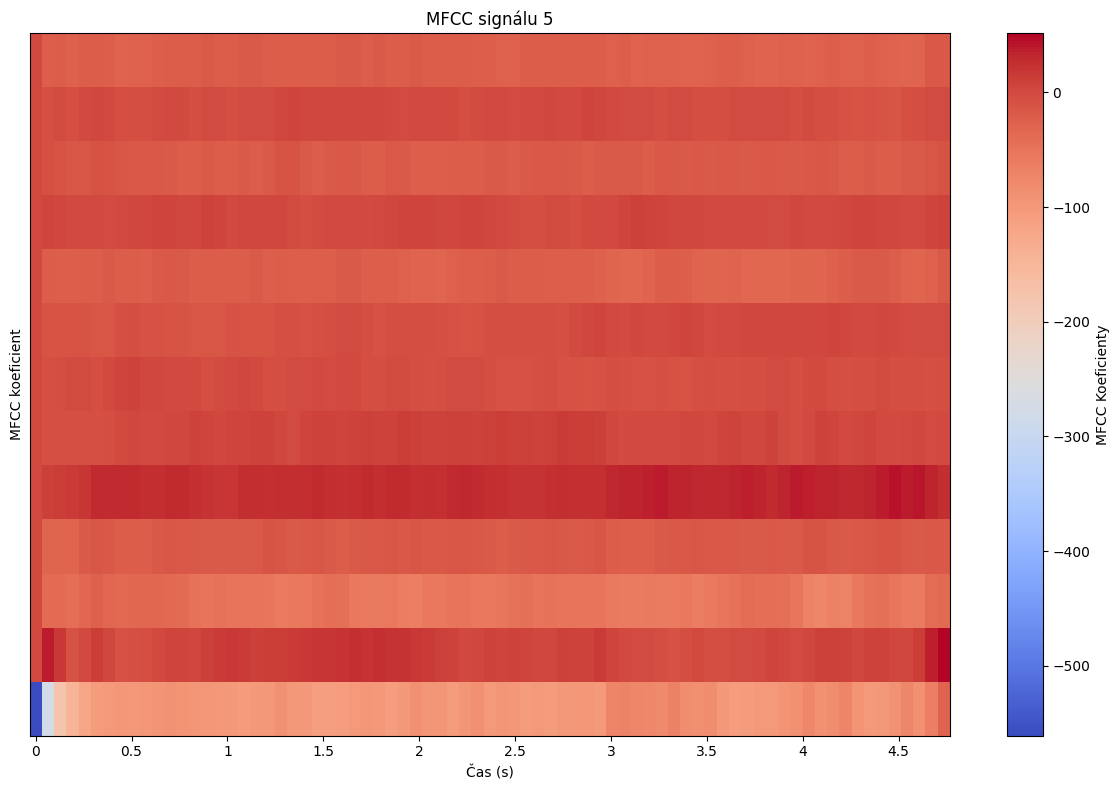

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import librosa.display
import wfdb
from scipy.signal import find_peaks

def nacti_zvukova_data(slozka):
    """ Načte zvuková data a odpovídající štítky ze složky """
    zvukova_data = []
    stitky = []
    
    for soubor in os.listdir(slozka):
        if soubor.endswith('.dat'):
            zaznam = wfdb.rdrecord(os.path.join(slozka, soubor[:-4]))
            zvukova_data.append(zaznam.p_signal.flatten())
            
            stitek = nacti_stitek(os.path.join(slozka, soubor[:-4]))
            stitky.append(stitek)
    
    return zvukova_data, stitky

def nacti_stitek(nazev_souboru):
    """ Načte štítek z odpovídajícího souboru .txt """
    with open(nazev_souboru + '.txt', 'r') as f:
        stitek = f.readline().strip()
    return stitek

def vypocitej_mfcc(signal, vzorkovaci_frekvence=8000, pocet_mfcc=13):
    """ Výpočet MFCC koeficientů """
    mfcc = librosa.feature.mfcc(y=signal, sr=vzorkovaci_frekvence, n_mfcc=pocet_mfcc)
    return mfcc

def vizualizuj_mfcc(mfcc, index_signalu, vzorkovaci_frekvence=8000):
    """ Vykreslení MFCC spektrogramu """
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(mfcc, x_axis='time', sr=vzorkovaci_frekvence, cmap='coolwarm')
    plt.colorbar(label='MFCC Koeficienty')
    plt.title(f'MFCC signálu {index_signalu + 1}')
    plt.xlabel('Čas (s)')
    plt.ylabel('MFCC koeficient')
    plt.tight_layout()
    plt.show()

def vypocitej_mfcc_pro_vsechny(zvukova_data, vzorkovaci_frekvence=8000, pocet_mfcc=13):
    """ Výpočet MFCC pro všechny nahrávky a přidání do existujícího CSV """
    mfcc_hodnoty = []
    mfcc_data = []
    for index, signal in enumerate(zvukova_data):
        mfcc = vypocitej_mfcc(signal, vzorkovaci_frekvence, pocet_mfcc)
        mfcc_hodnoty.append(mfcc)
        
        # Průměrné hodnoty MFCC pro každý koeficient
        prumerne_mfcc = np.mean(mfcc, axis=1).tolist()
        mfcc_data.append(prumerne_mfcc)    
    # Načtení existujícího CSV
    csv_soubor = "vysledky.csv"
    df = pd.read_csv(csv_soubor)
    
    # Přidání nového sloupce s MFCC
    for i in range(pocet_mfcc):
        df[f"MFCC_{i+1}"] = [row[i] for row in mfcc_data]
    
    # Uložení zpět do CSV
    df.to_csv(csv_soubor, index=False, encoding="utf-8")
    return mfcc_hodnoty

# Načtení dat
slozka_zvuku = 'voice-icar/'
zvukova_data, stitky = nacti_zvukova_data(slozka_zvuku)

# Výpočet MFCC a přidání do existujícího CSV
mfcc_hodnoty = vypocitej_mfcc_pro_vsechny(zvukova_data)

# Vizualizace MFCC pro prvních 5 signálů
for index in range(min(5, len(zvukova_data))):
    mfcc = mfcc_hodnoty[index]
    vizualizuj_mfcc(mfcc, index)



In [86]:
import os
import numpy as np
import librosa
import librosa.display
import wfdb

def nacti_zvukova_data(slozka):
    zvukova_data = []
    stitky = []
    
    for nazev_souboru in os.listdir(slozka):
        if nazev_souboru.endswith('.dat'):
            zaznam = wfdb.rdrecord(os.path.join(slozka, nazev_souboru[:-4]))
            zvukova_data.append(zaznam.p_signal.flatten())
            
            stitek = nacti_stitek(os.path.join(slozka, nazev_souboru[:-4]))
            stitky.append(stitek)
    
    return zvukova_data, stitky

def nacti_stitek(nazev_souboru):
    with open(nazev_souboru + '.txt', 'r') as f:
        stitek = f.readline().strip()
    return stitek

def vypocitej_mfcc(signal, vzorkovaci_frekvence=8000, pocet_mfcc=13):
    mfcc = librosa.feature.mfcc(y=signal, sr=vzorkovaci_frekvence, n_mfcc=pocet_mfcc)
    return mfcc

def vypocitej_hnr(signal, vzorkovaci_frekvence=8000):
    stft = librosa.stft(signal)
    amplituda = np.abs(stft)
    harmonicka, sumova = librosa.decompose.hpss(amplituda)
    energie_harmonicka = np.sum(harmonicka**2, axis=0)
    energie_sumova = np.sum(sumova**2, axis=0)
    hnr = 10 * np.log10(energie_harmonicka / (energie_sumova + 1e-10))
    return np.mean(hnr)

def vypocitej_dalsi_priznaky(signal, vzorkovaci_frekvence=8000):
    zcr = librosa.feature.zero_crossing_rate(signal)
    spektralni_centroid = librosa.feature.spectral_centroid(y=signal, sr=vzorkovaci_frekvence)
    return np.mean(zcr), np.mean(spektralni_centroid)

def spoj_priznaky(hnr_sady, mfcc_sady, zcr_sady, spektralni_centroid_sady):
    spojene_priznaky = []
    for hnr, mfcc, zcr, spektralni_centroid in zip(hnr_sady, mfcc_sady, zcr_sady, spektralni_centroid_sady):
        mfcc_prumer = np.mean(mfcc, axis=1)
        spojene = np.concatenate(([hnr], mfcc_prumer, [zcr], [spektralni_centroid]))
        spojene_priznaky.append(spojene)
    return np.array(spojene_priznaky)

def klasifikuj_zaznamy(spojene_priznaky, hnr_prah, mfcc_prah, zcr_prah, spektralni_centroid_prah):
    klasifikace = []
    for priznaky in spojene_priznaky:
        hnr = priznaky[0]
        mfcc_prumer = np.mean(priznaky[1:13])
        zcr = priznaky[13]
        spektralni_centroid = priznaky[14]
        
        if (hnr < hnr_prah or mfcc_prumer < mfcc_prah or 
            zcr > zcr_prah or spektralni_centroid > spektralni_centroid_prah):
            klasifikace.append('Patologický')
        else:
            klasifikace.append('Zdravý')
    return klasifikace

slozka_zvuku = 'voice-icar/'
zvukova_data, stitky = nacti_zvukova_data(slozka_zvuku)

mfcc_sady = [vypocitej_mfcc(signal) for signal in zvukova_data]
hnr_sady = [vypocitej_hnr(signal) for signal in zvukova_data]
zcr_sady = [vypocitej_dalsi_priznaky(signal)[0] for signal in zvukova_data]
spektralni_centroid_sady = [vypocitej_dalsi_priznaky(signal)[1] for signal in zvukova_data]

spojene_priznaky = spoj_priznaky(hnr_sady, mfcc_sady, zcr_sady, spektralni_centroid_sady)

hnr_prah = 23  # Patologický zvuk má obvykle nižší HNR než zdravý
mfcc_prah = -65  # Patologické zvuky mohou mít nižší amplitudy
zcr_prah = 0.3  # Vyšší ZCR naznačuje patologický zvuk
spektralni_centroid_prah = 1000  # Patologické zvuky mohou mít nižší spektrální centroid

klasifikace = klasifikuj_zaznamy(spojene_priznaky, hnr_prah, mfcc_prah, zcr_prah, spektralni_centroid_prah)

pocet_patologickych = klasifikace.count('Patologický')
pocet_zdravych = klasifikace.count('Zdravý')

potvrzene_patologicke = 150
potvrzene_zdrave = 58

presnost_patologickych = min((pocet_patologickych / potvrzene_patologicke) * 100, 
                             100 - max(0, (pocet_patologickych - potvrzene_patologicke) / potvrzene_patologicke * 100))
presnost_zdravych = min((pocet_zdravych / potvrzene_zdrave) * 100, 
                        100 - max(0, (pocet_zdravych - potvrzene_zdrave) / potvrzene_zdrave * 100))

print(f'\nVýsledky:')
print(f'Patologických záznamů: {pocet_patologickych} (POTVRZENÝCH: {potvrzene_patologicke})')
print(f'Zdravých záznamů: {pocet_zdravych} (POTVRZENÝCH: {potvrzene_zdrave})')
print(f'Přesnost u patologických záznamů: {presnost_patologickych:.2f}% (včetně true false)')
print(f'Přesnost u zdravých záznamů: {presnost_zdravych:.2f}% (včetně true false)')


C:\Users\elisk\AppData\Local\Temp\ipykernel_14400\3755725632.py:36: RuntimeWarning: divide by zero encountered in log10
  hnr = 10 * np.log10(energie_harmonicka / (energie_sumova + 1e-10))



Výsledky:
Patologických záznamů: 162 (POTVRZENÝCH: 150)
Zdravých záznamů: 46 (POTVRZENÝCH: 58)
Přesnost u patologických záznamů: 92.00% (včetně true false)
Přesnost u zdravých záznamů: 79.31% (včetně true false)


In [83]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np

def načíst_anotace(složka):
    anotace = []
    for název_souboru in os.listdir(složka):
        if název_souboru.endswith('.hea'):
            with open(os.path.join(složka, název_souboru), 'r') as f:
                řádky = f.readlines()
                
                řádek_diagnózy = [řádek for řádek in řádky if '<diagnoses>' in řádek]
                if řádek_diagnózy:
                    diagnóza = řádek_diagnózy[0].split('<diagnoses>: ')[1].strip()
                    
                    if ' <' in diagnóza:
                        diagnóza = diagnóza.split(' <')[0]
                                        
                    if diagnóza.lower() != 'healthy':
                        anotace.append('Patologický')
                    else:
                        anotace.append('Zdravý')
                else:
                    anotace.append('Zdravý')  
    return anotace

def porovnat_s_anotacemi(klasifikace, anotace):
    počet_správných = 0
    výsledky = []  
    for predikce, skutečnost in zip(klasifikace, anotace):
        stav_shody = "Shoda" if predikce.lower() == skutečnost.lower() else "Neshoda"
        if stav_shody == "Shoda":
            počet_správných += 1
        výsledky.append((predikce, skutečnost, stav_shody))
    return počet_správných, výsledky

# Příklad souboru a dat
složka_souborů = 'voice-icar/'
csv_soubor = 'vysledky.csv'

# Načtení anotací
anotace = načíst_anotace(složka_souborů)

# Simulace klasifikace (nahraď skutečnými hodnotami)
klasifikace = ['Zdravý' if i % 2 == 0 else 'Patologický' for i in range(len(anotace))]

# Porovnání anotací s klasifikací
počet_správných, výsledky = porovnat_s_anotacemi(klasifikace, anotace)

# Uložení do CSV
if os.path.exists(csv_soubor):
    df = pd.read_csv(csv_soubor)
else:
    df = pd.DataFrame()

df['Predikce'] = [predikce for predikce, _, _ in výsledky]
df['Skutečnost'] = [skutečnost for _, skutečnost, _ in výsledky]
df['Stav shody'] = [stav_shody for _, _, stav_shody in výsledky]

df.to_csv(csv_soubor, index=False)

print(f'Data byla uložena do souboru {csv_soubor}.')



Data byla uložena do souboru vysledky.csv.


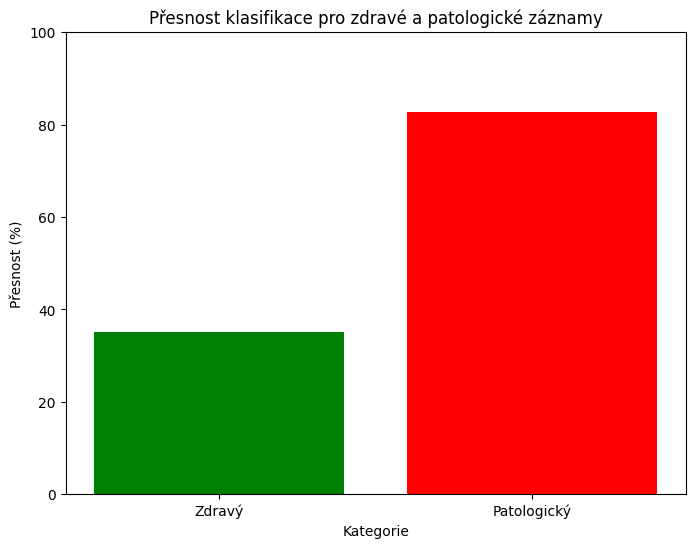

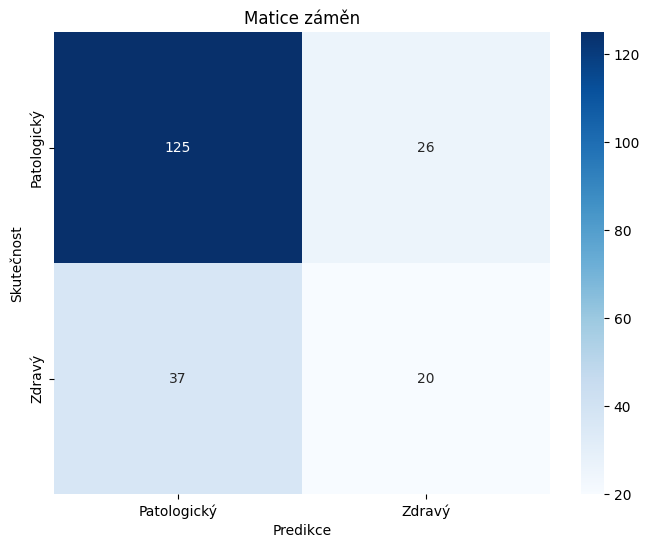

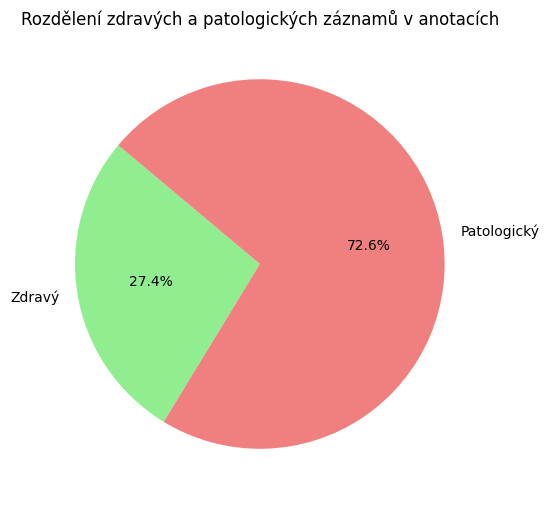

In [88]:
# Sloupcový graf
počet_zdravých = sum(1 for skutečnost in anotace if skutečnost.lower() == 'zdravý')
počet_patologických = sum(1 for skutečnost in anotace if skutečnost.lower() == 'patologický')

zdravý_správně = sum(1 for predikce, skutečnost in zip(klasifikace, anotace) if predikce.lower() == skutečnost.lower() and skutečnost.lower() == 'zdravý')
patologický_správně = sum(1 for predikce, skutečnost in zip(klasifikace, anotace) if predikce.lower() == skutečnost.lower() and skutečnost.lower() == 'patologický')

přesnost_zdravých = (zdravý_správně / počet_zdravých) * 100 if počet_zdravých > 0 else 0
přesnost_patologických = (patologický_správně / počet_patologických) * 100 if počet_patologických > 0 else 0

plt.figure(figsize=(8, 6))
plt.bar(['Zdravý', 'Patologický'], [přesnost_zdravých, přesnost_patologických], color=['green', 'red'])
plt.xlabel('Kategorie')
plt.ylabel('Přesnost (%)')
plt.title('Přesnost klasifikace pro zdravé a patologické záznamy')
plt.ylim(0, 100)
plt.show()


# Matice záměn
matice_záměn = confusion_matrix([1 if skutečnost.lower() == 'zdravý' else 0 for skutečnost in anotace],
                                [1 if predikce.lower() == 'zdravý' else 0 for predikce in klasifikace])

plt.figure(figsize=(8, 6))
sns.heatmap(matice_záměn, annot=True, fmt='d', cmap='Blues', xticklabels=['Patologický', 'Zdravý'], yticklabels=['Patologický', 'Zdravý'])
plt.xlabel('Predikce')
plt.ylabel('Skutečnost')
plt.title('Matice záměn')
plt.show()

# Výsečový graf
plt.figure(figsize=(8, 6))
plt.pie([počet_zdravých, počet_patologických], labels=['Zdravý', 'Patologický'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=140)
plt.title('Rozdělení zdravých a patologických záznamů v anotacích')
plt.show()

In [85]:
import pandas as pd

# Načtení CSV souboru
csv_soubor = 'vysledky.csv'
df = pd.read_csv(csv_soubor)

# Seznam sloupců, které chcete odstranit
sloupce_k_odstraneni = ['predikce','Anotace','Stav shody','Klasifikace.1','Anotace.1','Stav shody.1','Predikce','Skutečnost','Predikce5','Skutečnost5','Stav shody5']  # Změňte podle potřeby

# Smazání vybraných sloupců
df = df.drop(columns=sloupce_k_odstraneni, errors='ignore')

# Uložení zpět do CSV souboru
df.to_csv(csv_soubor, index=False)

print(f"Vybrané sloupce byly odstraněny a změny uloženy do {csv_soubor}.")


Vybrané sloupce byly odstraněny a změny uloženy do vysledky.csv.
